# Generates Table of detection probabilities and key metrics for the CPP Targets Wiki

### Imports

In [1]:
# Autoreload extension
%load_ext autoreload
%autoreload 2

In [2]:
import os, numpy as np, pandas as pd
from astropy.time import Time
from astropy.table import Table
from decimal import Decimal
from astropy import units as u, constants as c
import matplotlib.pyplot as plt
from roman_pointing.roman_pointing import calcRomanAngles, getL2Positions
from astroquery.simbad import Simbad
from astropy.coordinates import (
    SkyCoord,
    Distance,
    BarycentricMeanEcliptic,
)
from roman_table import *

### Helper Functions

In [3]:
def get_GB_sunang(ts):
    # ts must be astropy.Time object
    simbad = Simbad()
    simbad.add_votable_fields("pmra", "pmdec", "plx_value", "rvz_radvel")
    res = simbad.query_object("Sagittarius A*")
    gb = SkyCoord(
        res["ra"].value.data[0],
        res["dec"].value.data[0],
        unit=(res["ra"].unit, res["dec"].unit),
        frame="icrs",
        distance=Distance(8 * u.kpc),
        pm_ra_cosdec=0 * res["pmra"].unit,
        pm_dec=0 * res["pmdec"].unit,
        radial_velocity=0 * res["rvz_radvel"].unit,
        equinox="J2000",
        obstime="J2000",
    ).transform_to(BarycentricMeanEcliptic)
    sun_ang_ref, _, _, _ = calcRomanAngles(
        gb, ts, getL2Positions(ts)
    )
    return sun_ang_ref

def get_targ_sunang(star,ts):
    # ts must be astropy.Time object
    simbad_name = " ".join(star.split("_"))
    simbad = Simbad()
    simbad.add_votable_fields("pmra", "pmdec", "plx_value", "rvz_radvel")
    res = simbad.query_object(simbad_name)
    target = SkyCoord(
        res["ra"].value.data[0],
        res["dec"].value.data[0],
        unit=(res["ra"].unit, res["dec"].unit),
        frame="icrs",
        distance=Distance(parallax=res["plx_value"].value.data[0] * res["plx_value"].unit),
        pm_ra_cosdec=res["pmra"].value.data[0] * res["pmra"].unit,
        pm_dec=res["pmdec"].value.data[0] * res["pmdec"].unit,
        radial_velocity=res["rvz_radvel"].value.data[0] * res["rvz_radvel"].unit,
        equinox="J2000",
        obstime="J2000",
    ).transform_to(BarycentricMeanEcliptic)

    sun_ang_targ, _, _, _ = calcRomanAngles(
        target, ts, getL2Positions(ts)
    )
    return sun_ang_targ

### Main

In [4]:
# Load contrast curve
concurve_fpath = 'concurves/concurve_optimistic.csv'
concurve_df = pd.read_csv(concurve_fpath)
concurve_df['D'] = 2.4
concurve_df['sep_mas'] = concurve_df.loD * concurve_df['lambda'] * 1e-9 / concurve_df['D'] * u.radian.to(u.mas)
display(concurve_df)
concurve = np.array([
    concurve_df.sep_mas.values,
    concurve_df.contr.values])

loD         contr  lambda  t_int_hr  fpp  SNR    D     sep_mas
0   3.0  1.000000e-01     575        10    2    5  2.4  148.252829
1   3.1  4.400000e-09     575        10    2    5  2.4  153.194590
2   3.5  4.400000e-09     575        10    2    5  2.4  172.961634
3   4.0  3.100000e-09     575        10    2    5  2.4  197.670439
4   4.5  3.100000e-09     575        10    2    5  2.4  222.379244
5   5.0  3.100000e-09     575        10    2    5  2.4  247.088049
6   5.5  2.200000e-09     575        10    2    5  2.4  271.796854
7   6.1  2.200000e-09     575        10    2    5  2.4  301.447420
8   7.0  2.200000e-09     575        10    2    5  2.4  345.923269
9   8.0  2.200000e-09     575        10    2    5  2.4  395.340879
10  8.5  2.200000e-09     575        10    2    5  2.4  420.049684
11  8.8  2.200000e-09     575        10    2    5  2.4  434.874967
12  9.0  1.000000e-01     575        10    2    5  2.4  444.758488

Planet index 0/14: 47_UMa_c
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/47_UMa_c_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 0.56 +0.33/-0.08 M_Jup
Planet radius: 0.88 +0.10/-0.03 R_Jup
Inclination: 90.30 [47.47, 133.06] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/47_UMa_c_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob 0.20 on 2027-06-20
Peak det prob 0.29 on 2027-12-27
Peak det prob 0.30 on 2028-01-31
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/47_UMa_c_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


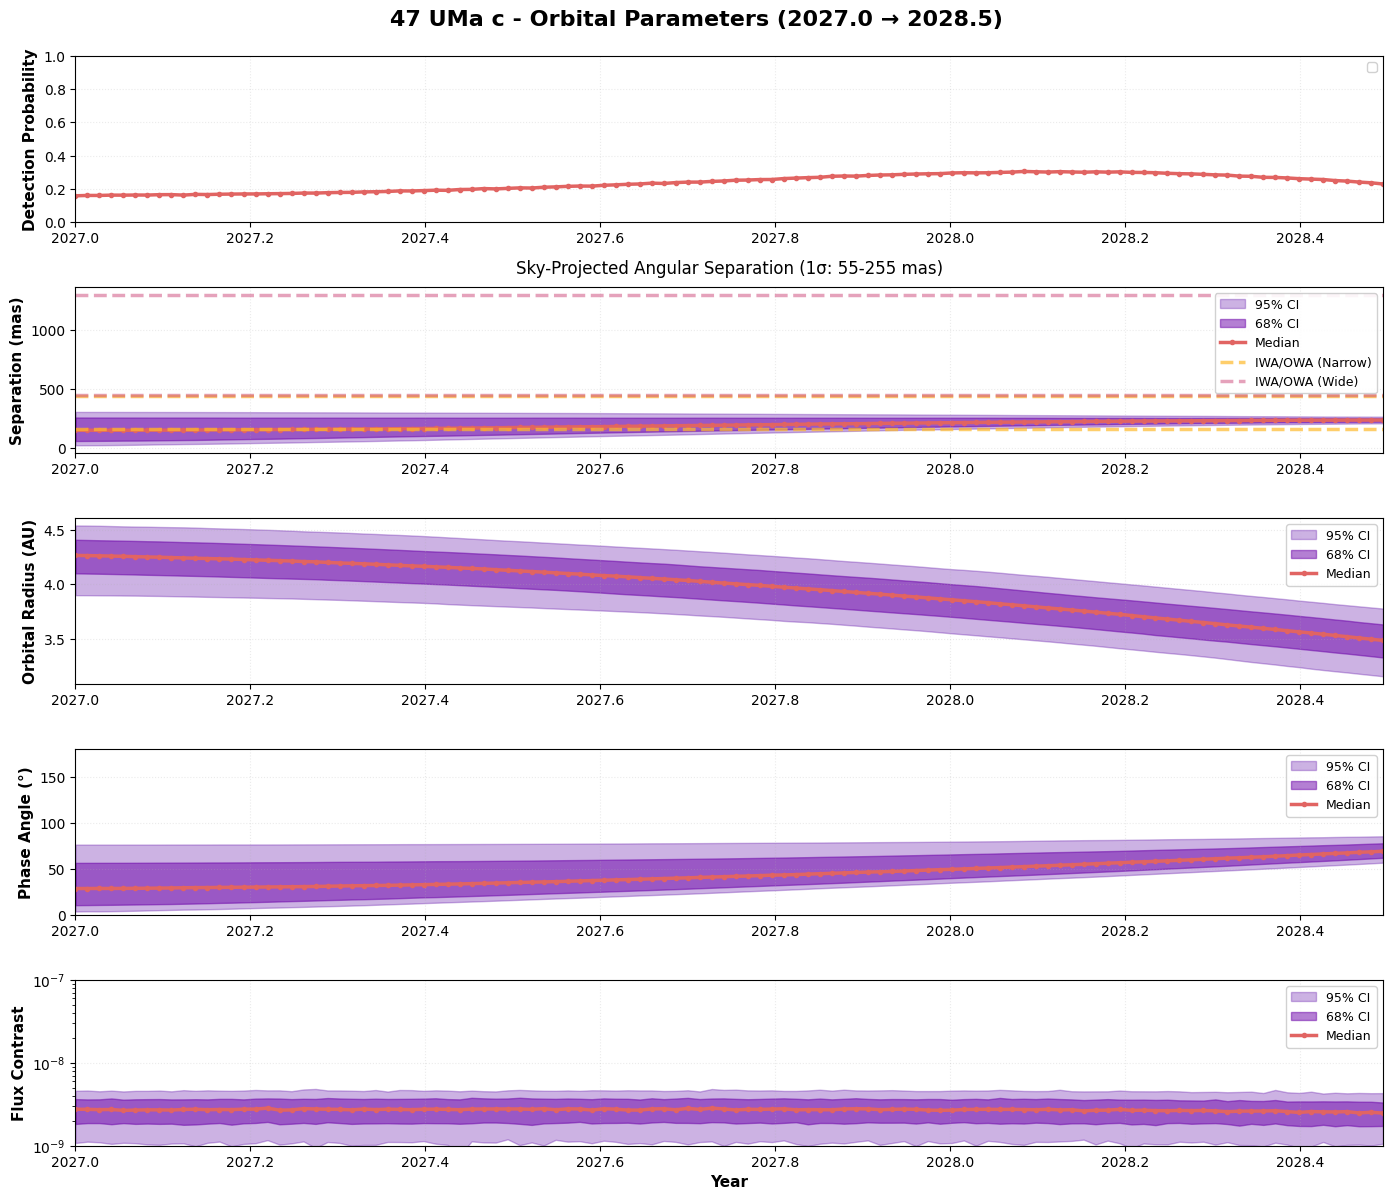

Planet index 1/14: 47_UMa_b
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/47_UMa_b_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 2.77 +1.64/-0.34 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.03 [47.23, 132.62] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/47_UMa_b_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob 0.00 on 2027-01-06
Peak det prob 0.01 on 2027-10-03
Peak det prob 0.00 on 2028-06-24
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/47_UMa_b_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


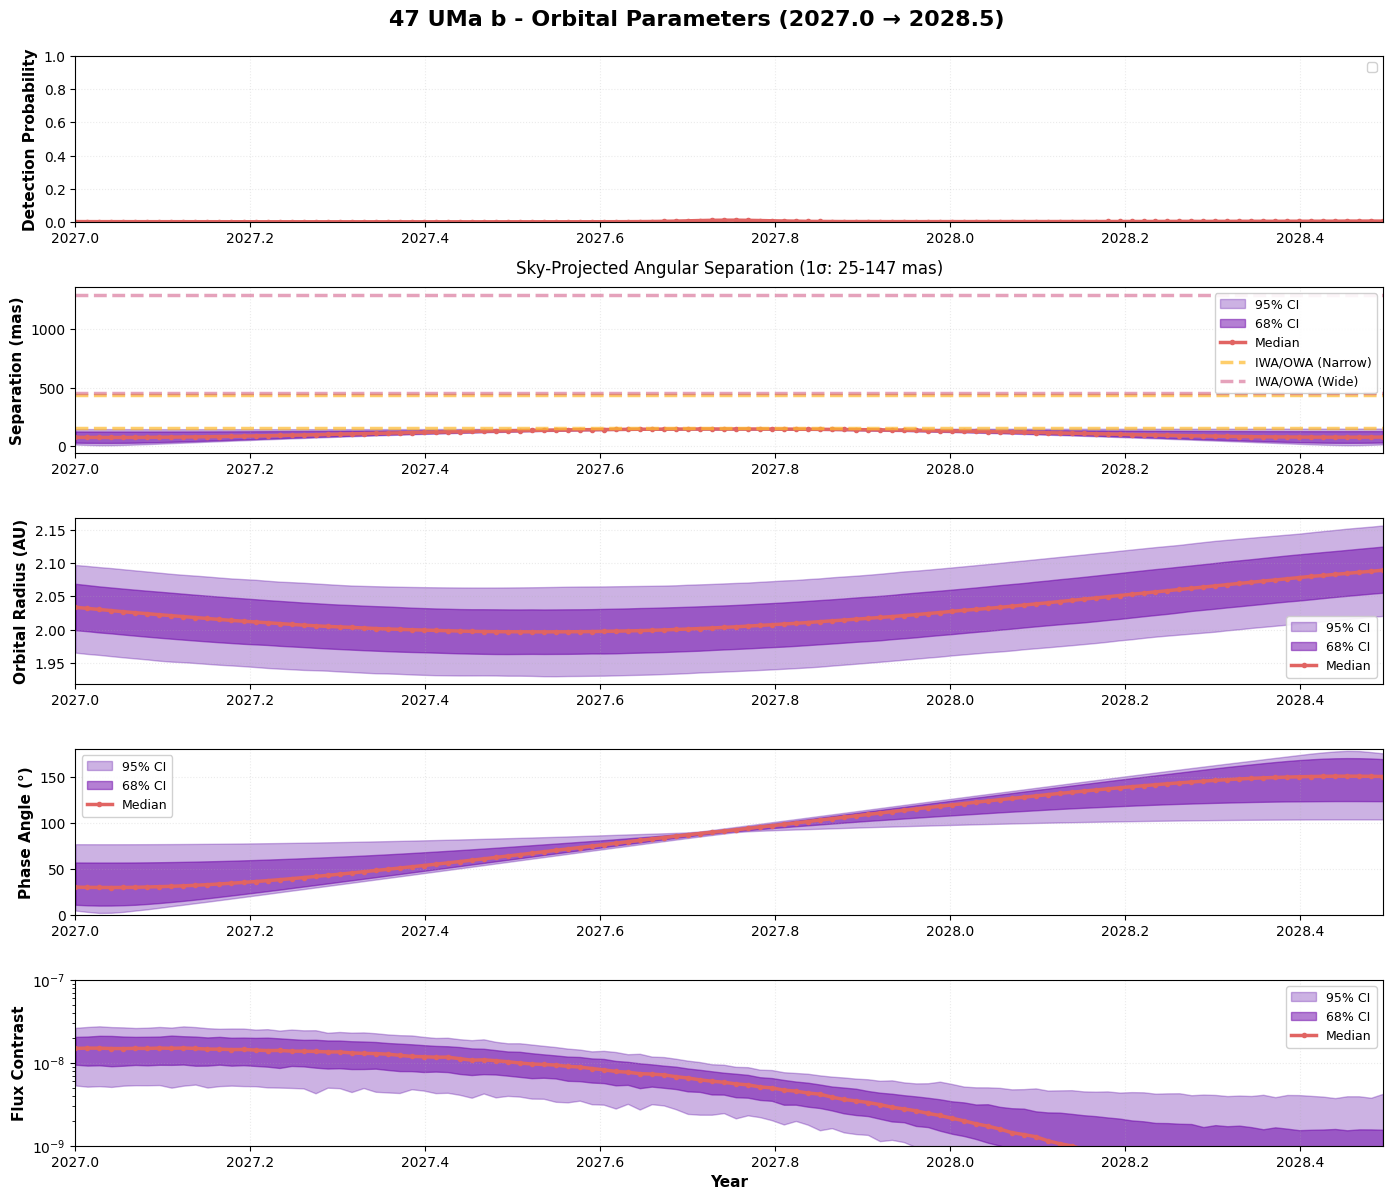

Planet index 2/14: 47_UMa_d
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/47_UMa_d_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 1.74 +1.01/-0.31 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 89.91 [47.09, 132.94] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/47_UMa_d_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob -0.00 on 2027-01-06
Peak det prob -0.00 on 2027-07-05
Peak det prob -0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/47_UMa_d_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


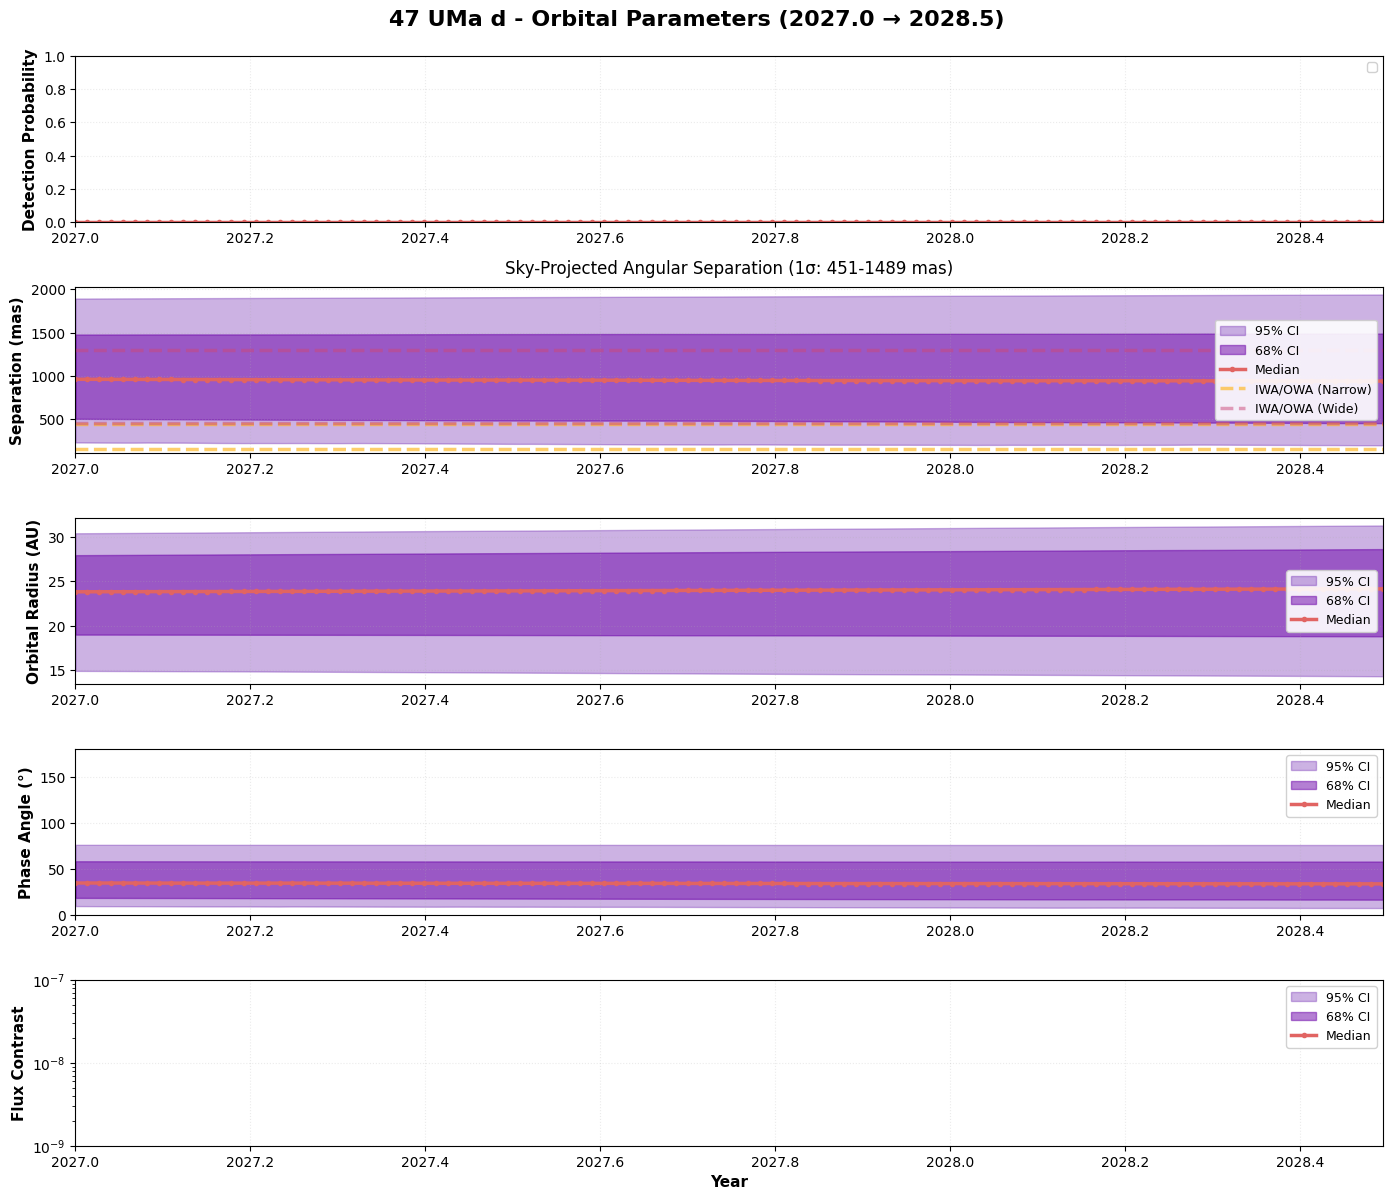

Planet index 3/14: 55_Cnc_d
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/55_Cnc_d_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 3.93 +2.35/-0.48 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 89.69 [47.00, 132.98] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/55_Cnc_d_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob -0.00 on 2027-01-06
Peak det prob -0.00 on 2027-07-05
Peak det prob -0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/55_Cnc_d_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


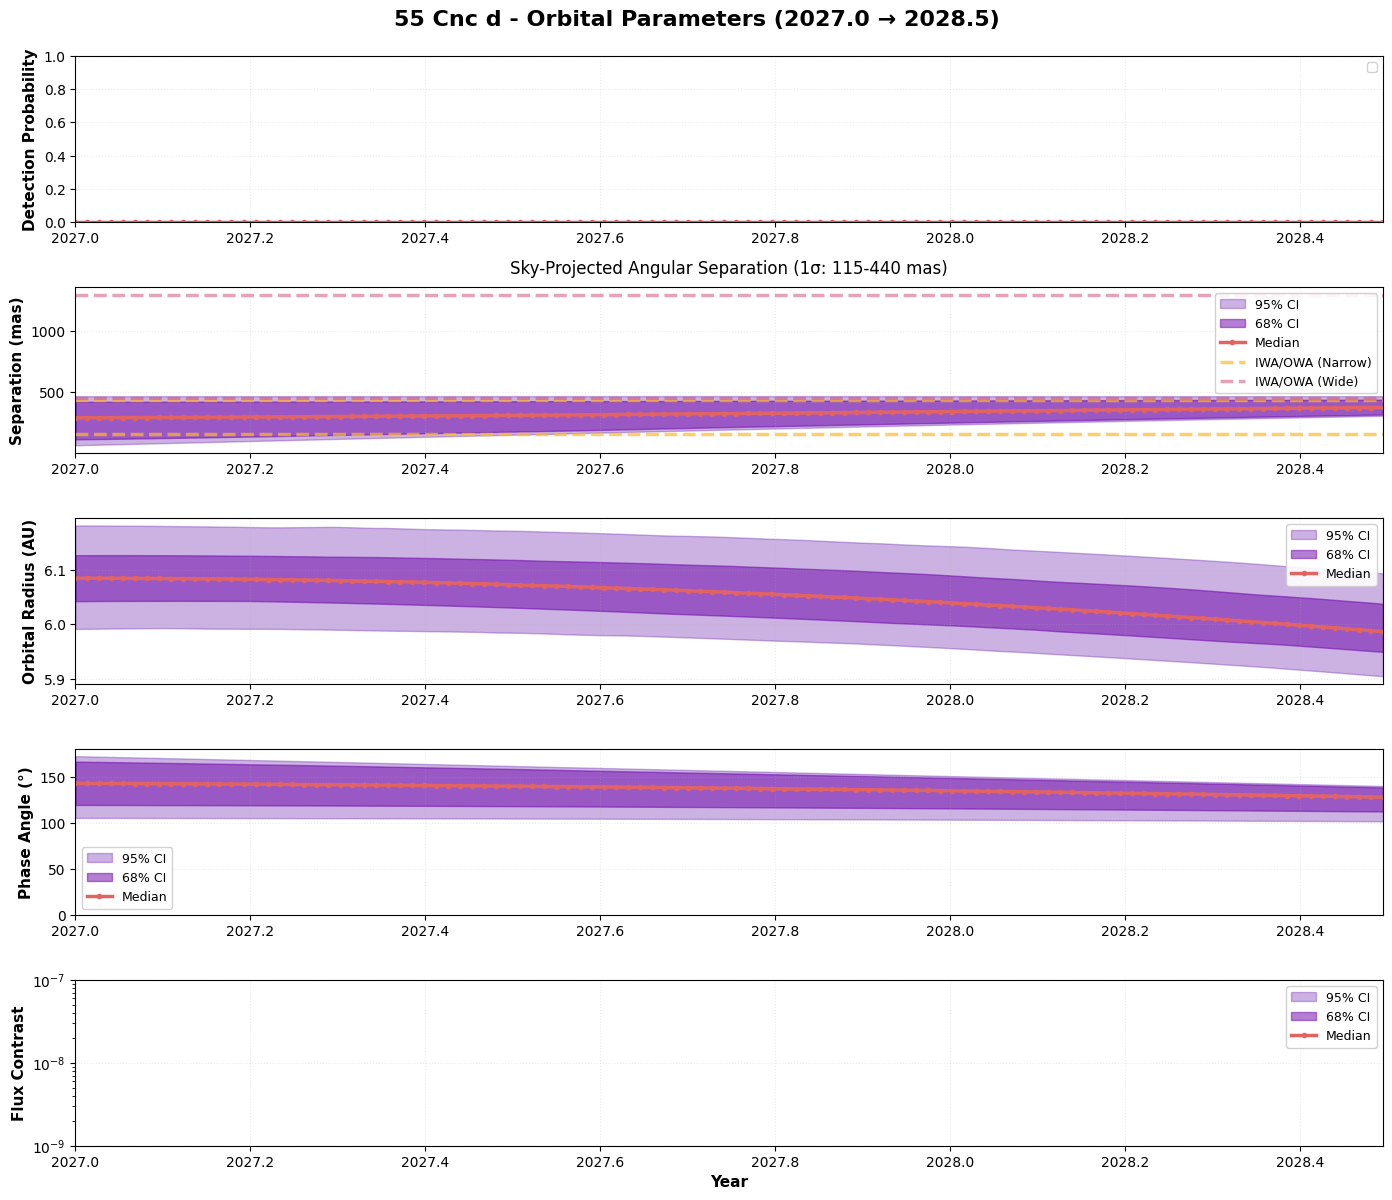

Planet index 4/14: eps_Eri_b
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/eps_Eri_b_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 0.74 +0.44/-0.10 M_Jup
Planet radius: 0.93 +0.07/-0.03 R_Jup
Inclination: 89.82 [46.93, 132.72] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/eps_Eri_b_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob 0.24 on 2027-02-10
Peak det prob 0.06 on 2027-07-05
Peak det prob 0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/eps_Eri_b_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


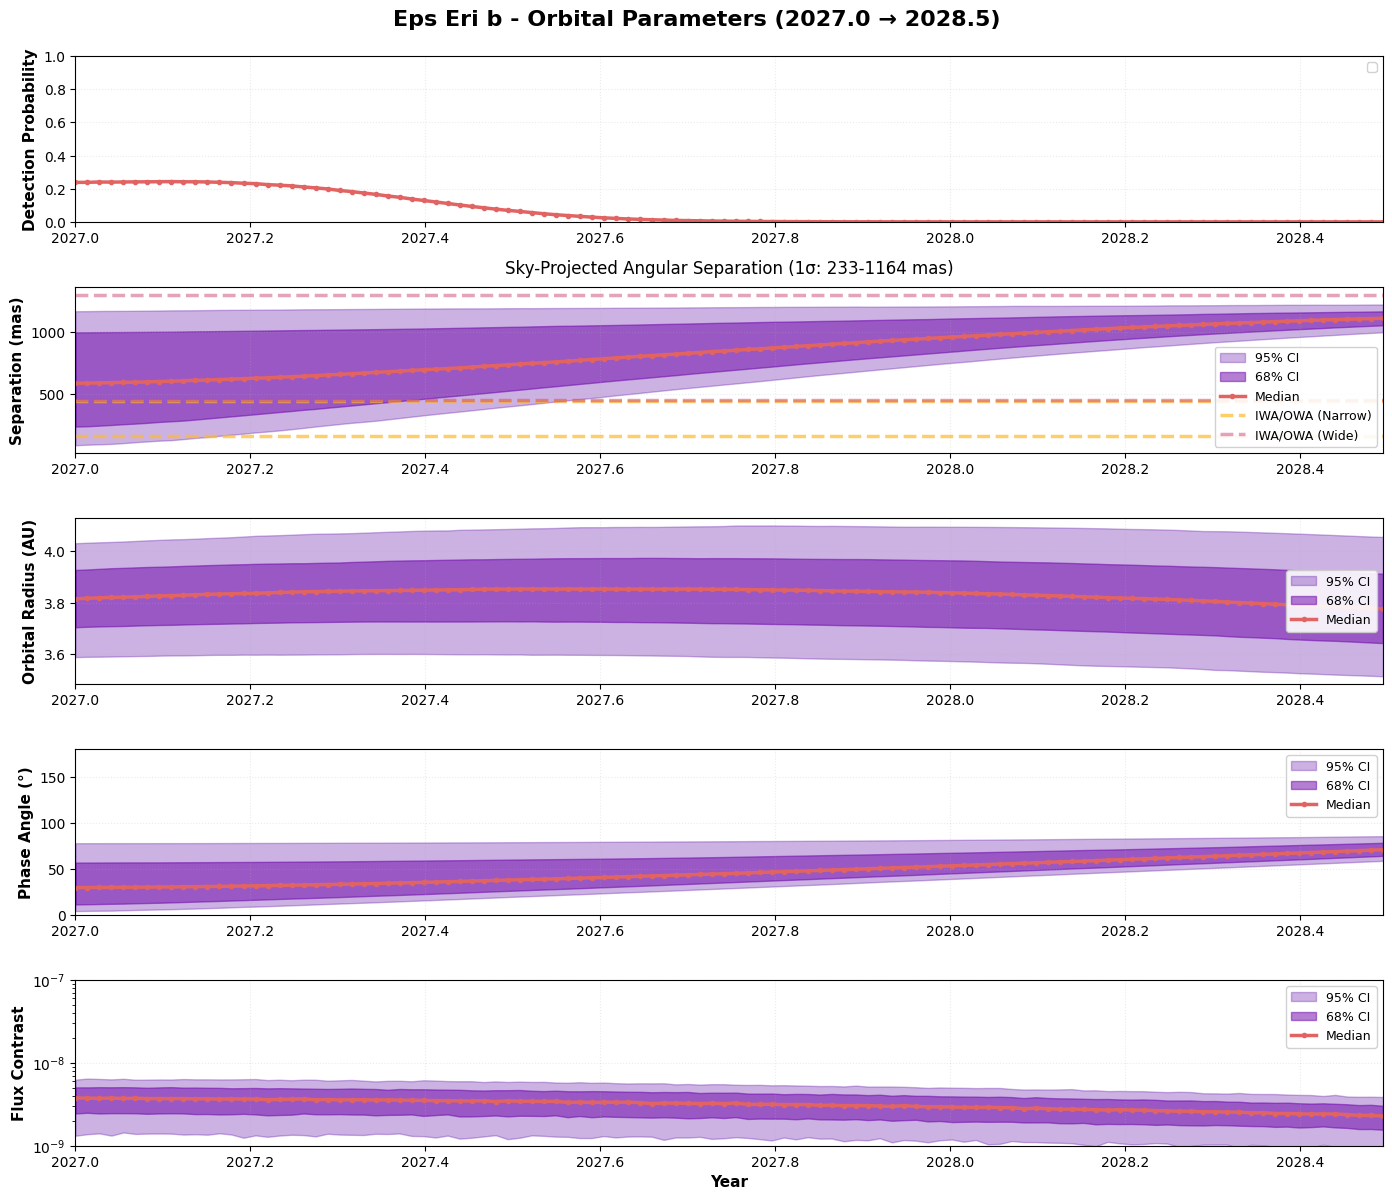

Planet index 5/14: HD_87883_b
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_87883_b_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 2.64 +1.54/-0.38 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.36 [47.24, 132.92] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_87883_b_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob 0.00 on 2027-05-06
Peak det prob 0.00 on 2027-09-28
Peak det prob 0.00 on 2028-05-05
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_87883_b_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


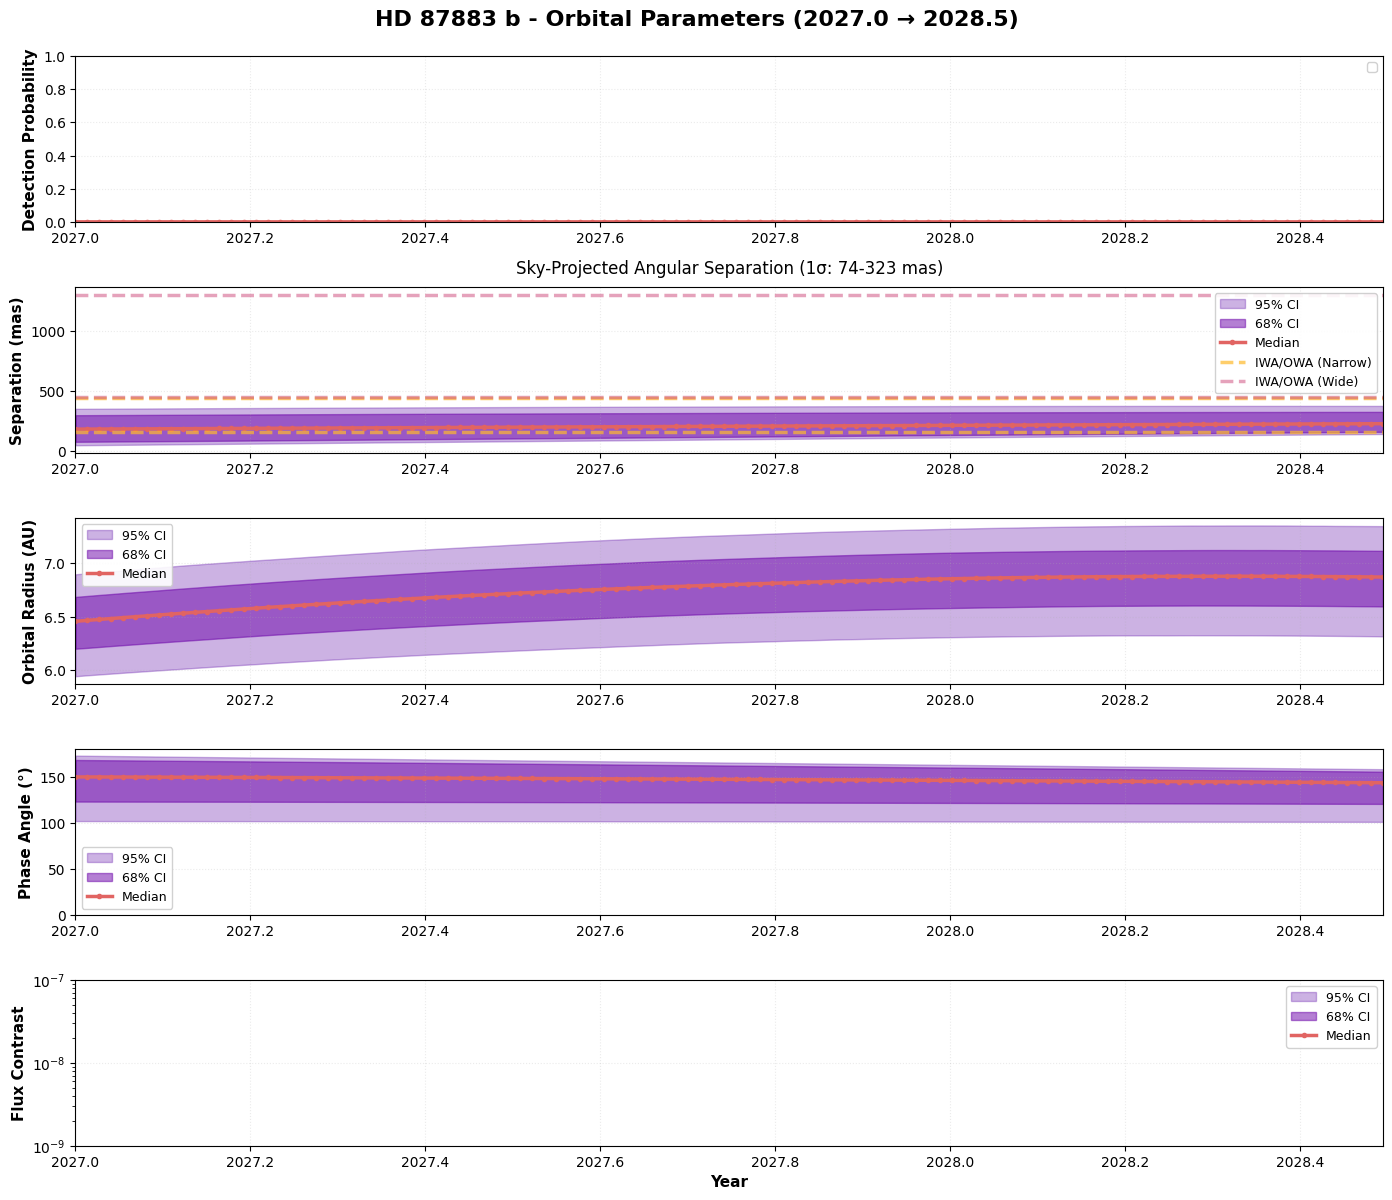

Planet index 6/14: HD_114783_c
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_114783_c_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 0.82 +0.48/-0.11 M_Jup
Planet radius: 0.96 +0.04/-0.03 R_Jup
Inclination: 89.93 [47.15, 132.55] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_114783_c_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob 0.00 on 2027-01-31
Peak det prob 0.00 on 2027-08-14
Peak det prob 0.00 on 2028-01-06
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_114783_c_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


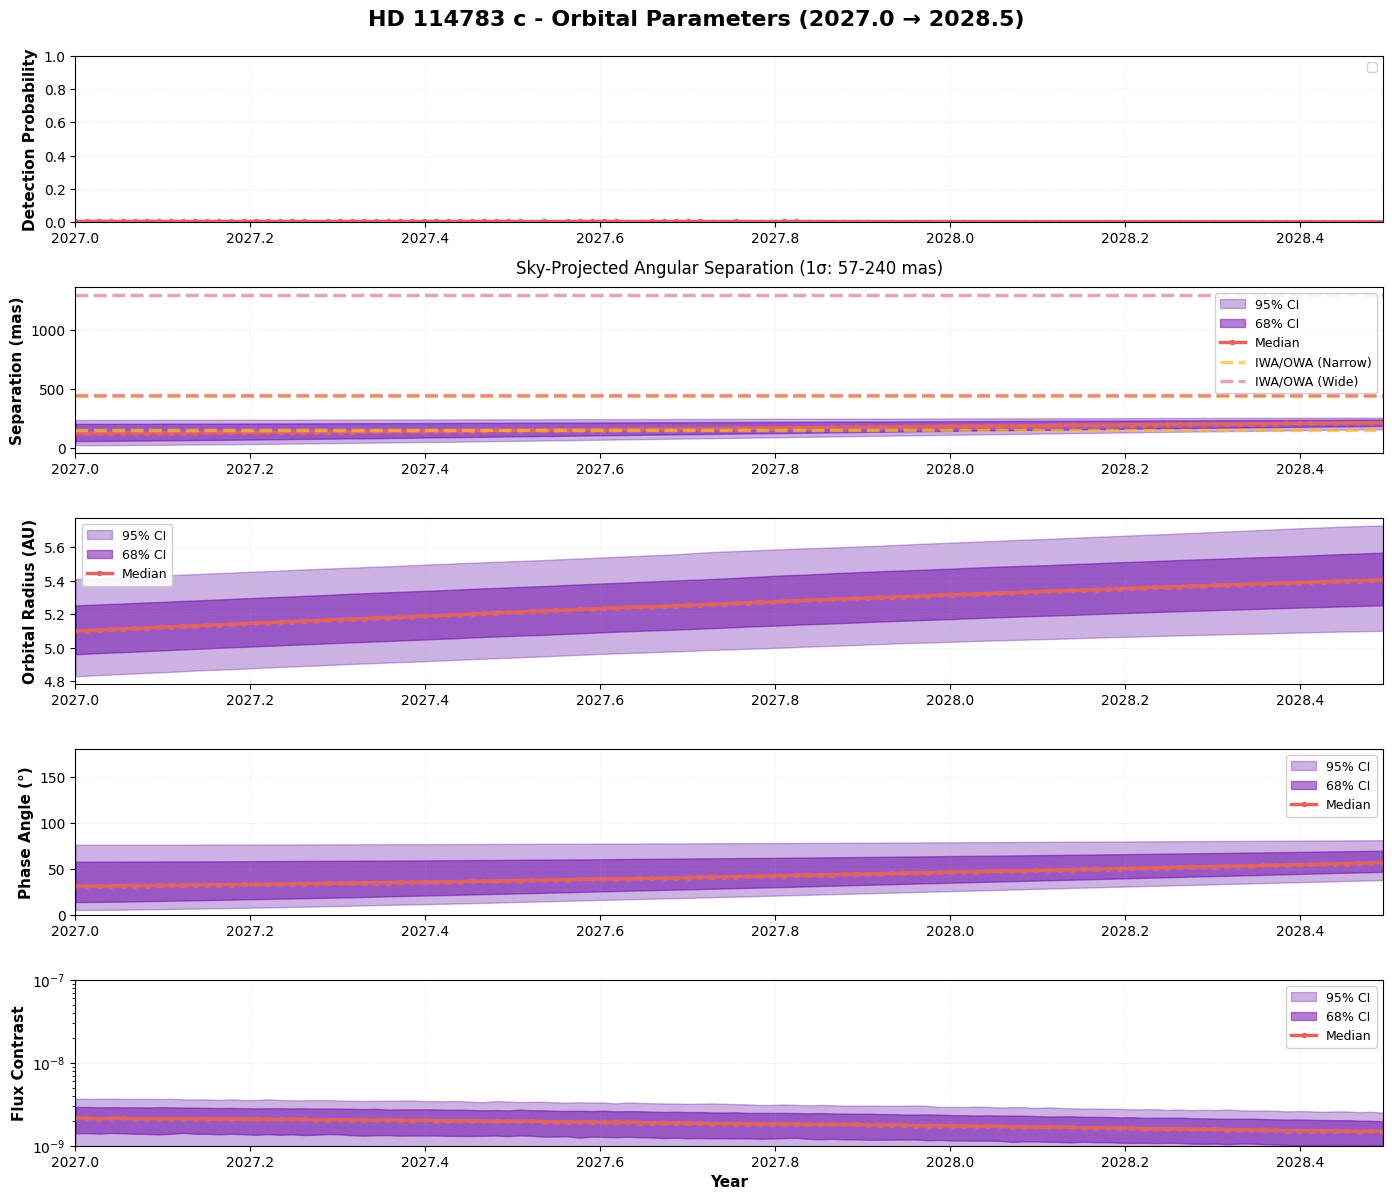

Planet index 7/14: HD_134987_c
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_134987_c_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 1.23 +0.72/-0.15 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 89.85 [47.36, 132.70] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_134987_c_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob 0.00 on 2027-01-21
Peak det prob 0.00 on 2027-07-15
Peak det prob 0.00 on 2028-01-06
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_134987_c_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


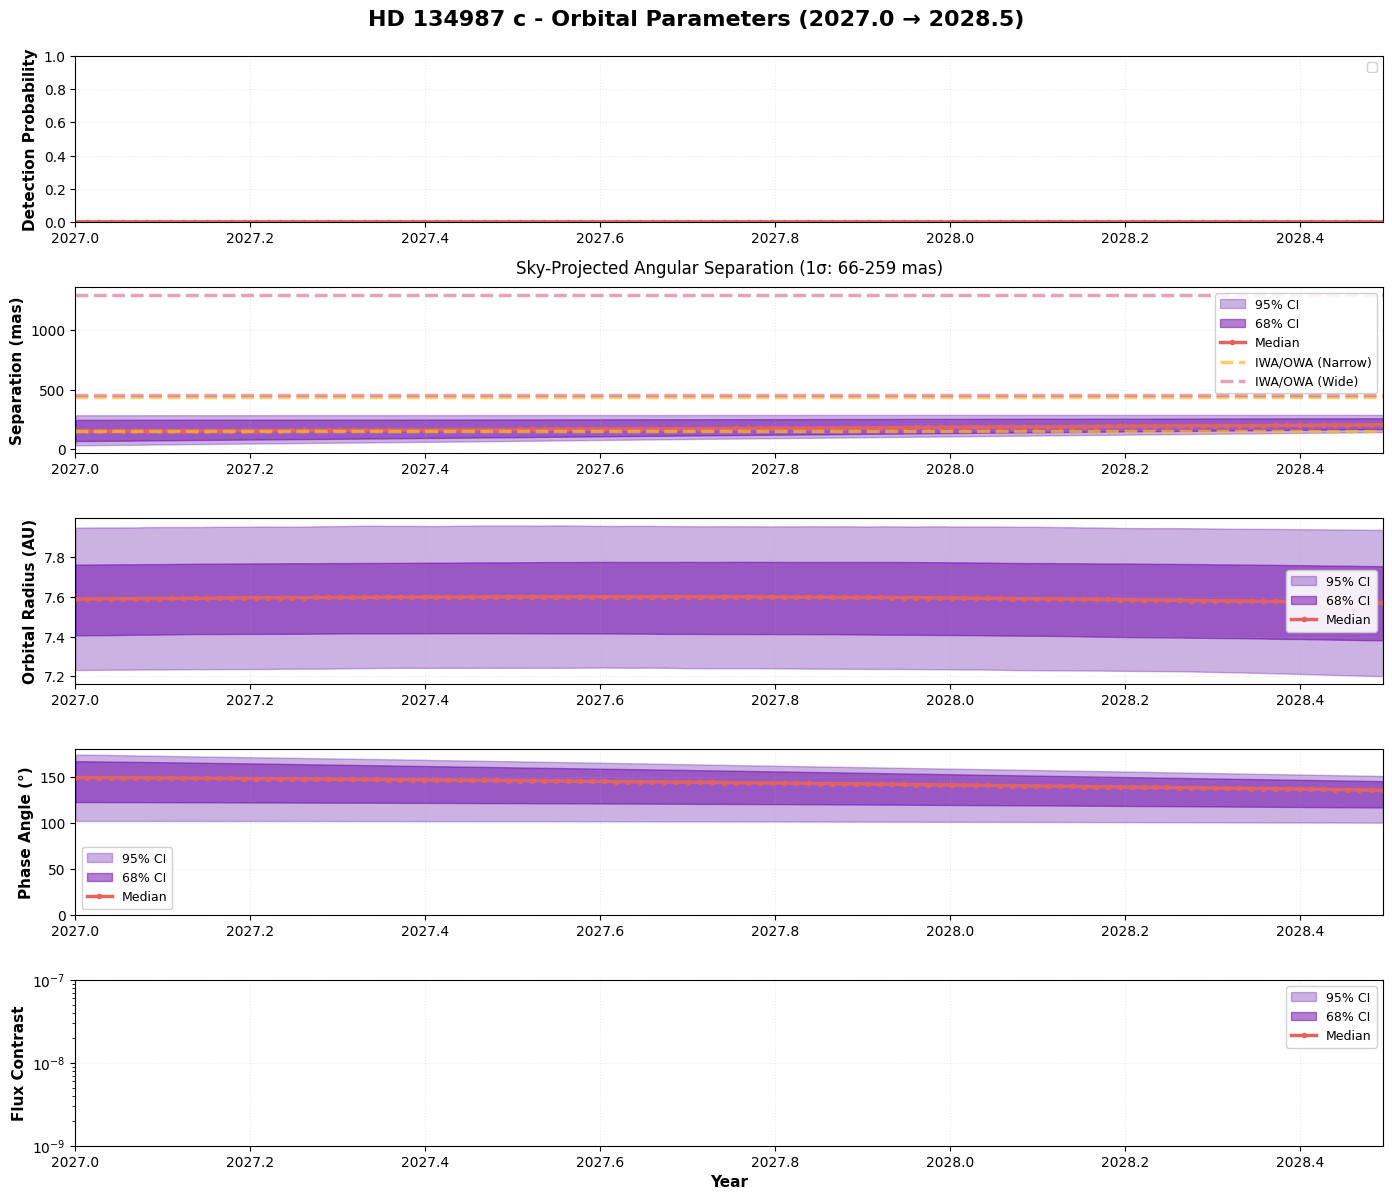

Planet index 8/14: HD_154345_b
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_154345_b_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 1.26 +0.73/-0.18 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.04 [47.27, 132.86] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_154345_b_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob 0.19 on 2027-01-06
Peak det prob 0.06 on 2027-07-05
Peak det prob 0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_154345_b_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


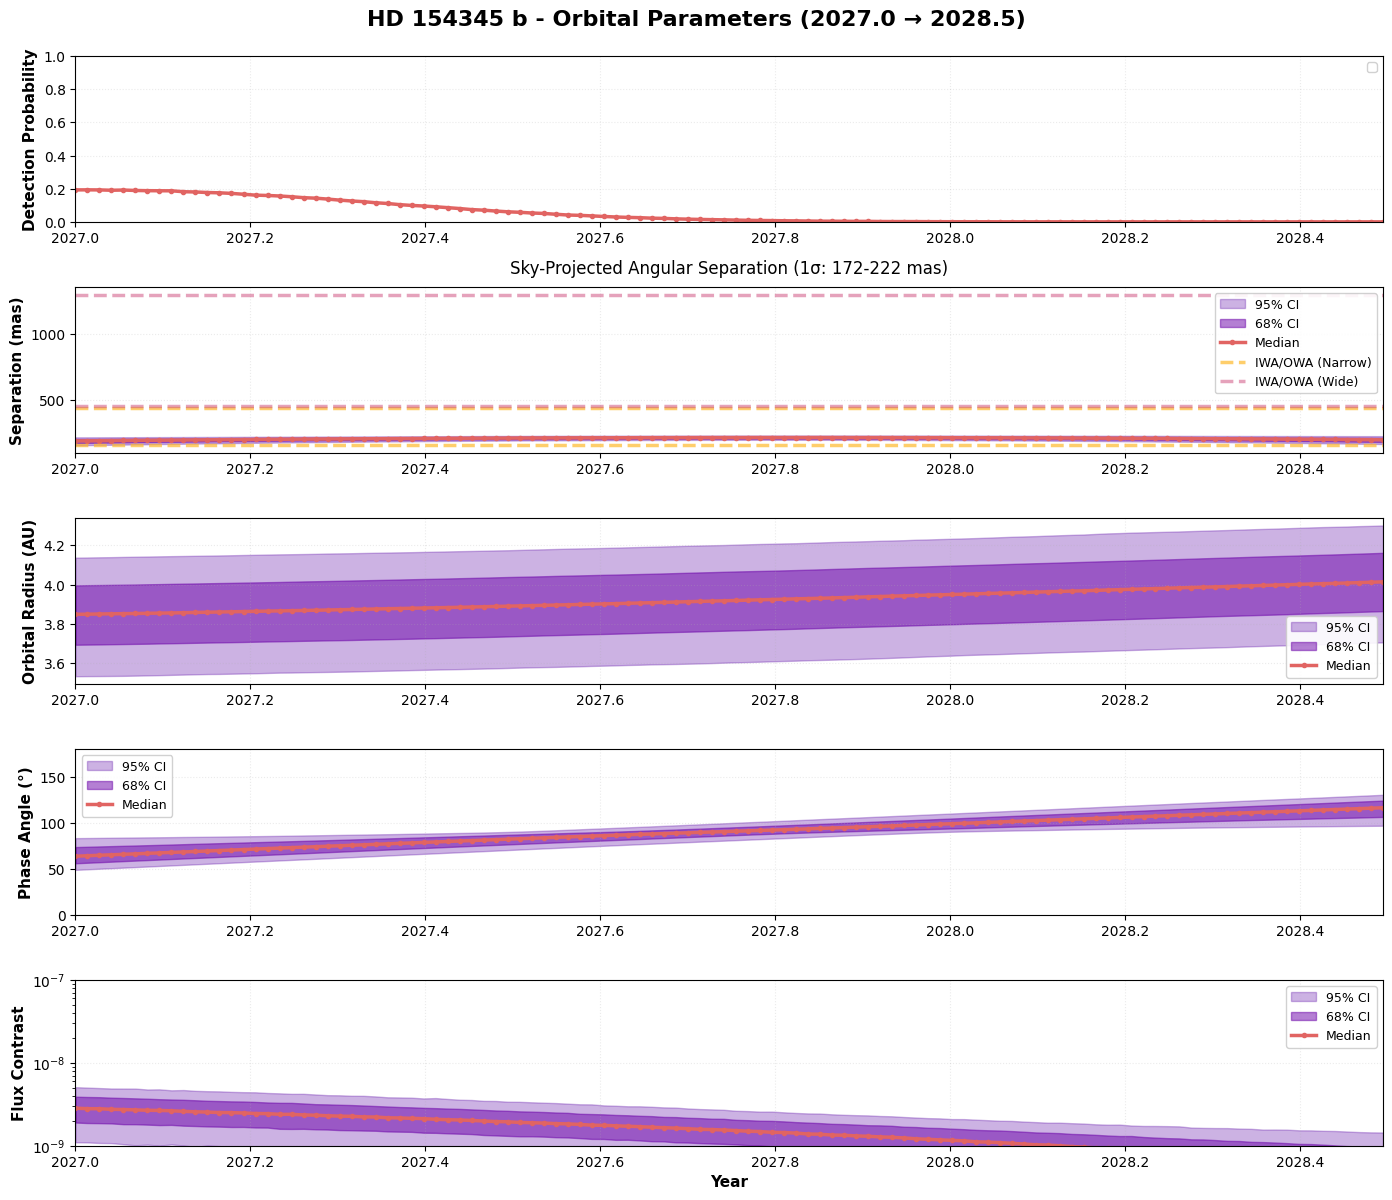

Planet index 9/14: HD_160691_c
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_160691_c_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 2.14 +1.27/-0.26 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 89.96 [47.11, 132.73] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_160691_c_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob 0.00 on 2027-05-01
Peak det prob 0.00 on 2027-07-10
Peak det prob 0.00 on 2028-01-16
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_160691_c_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


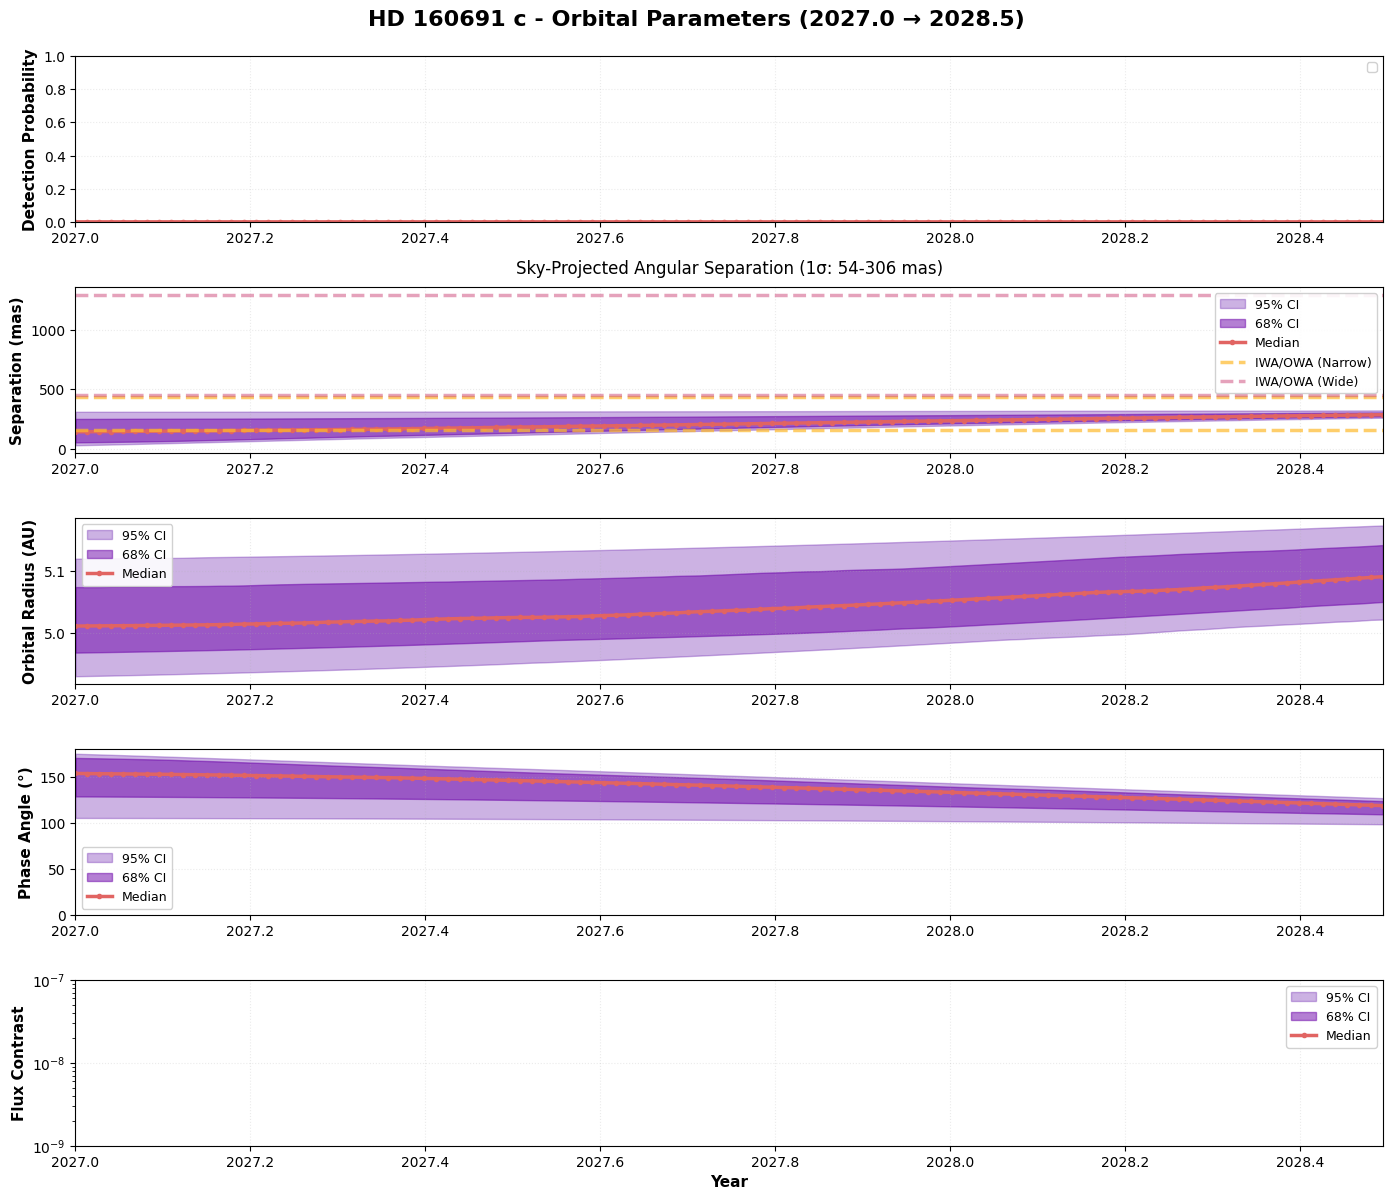

Planet index 10/14: HD_190360_b
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_190360_b_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 1.75 +1.02/-0.24 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.25 [47.57, 133.10] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_190360_b_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob 0.13 on 2027-01-11
Peak det prob 0.16 on 2027-12-27
Peak det prob 0.29 on 2028-06-24
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_190360_b_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


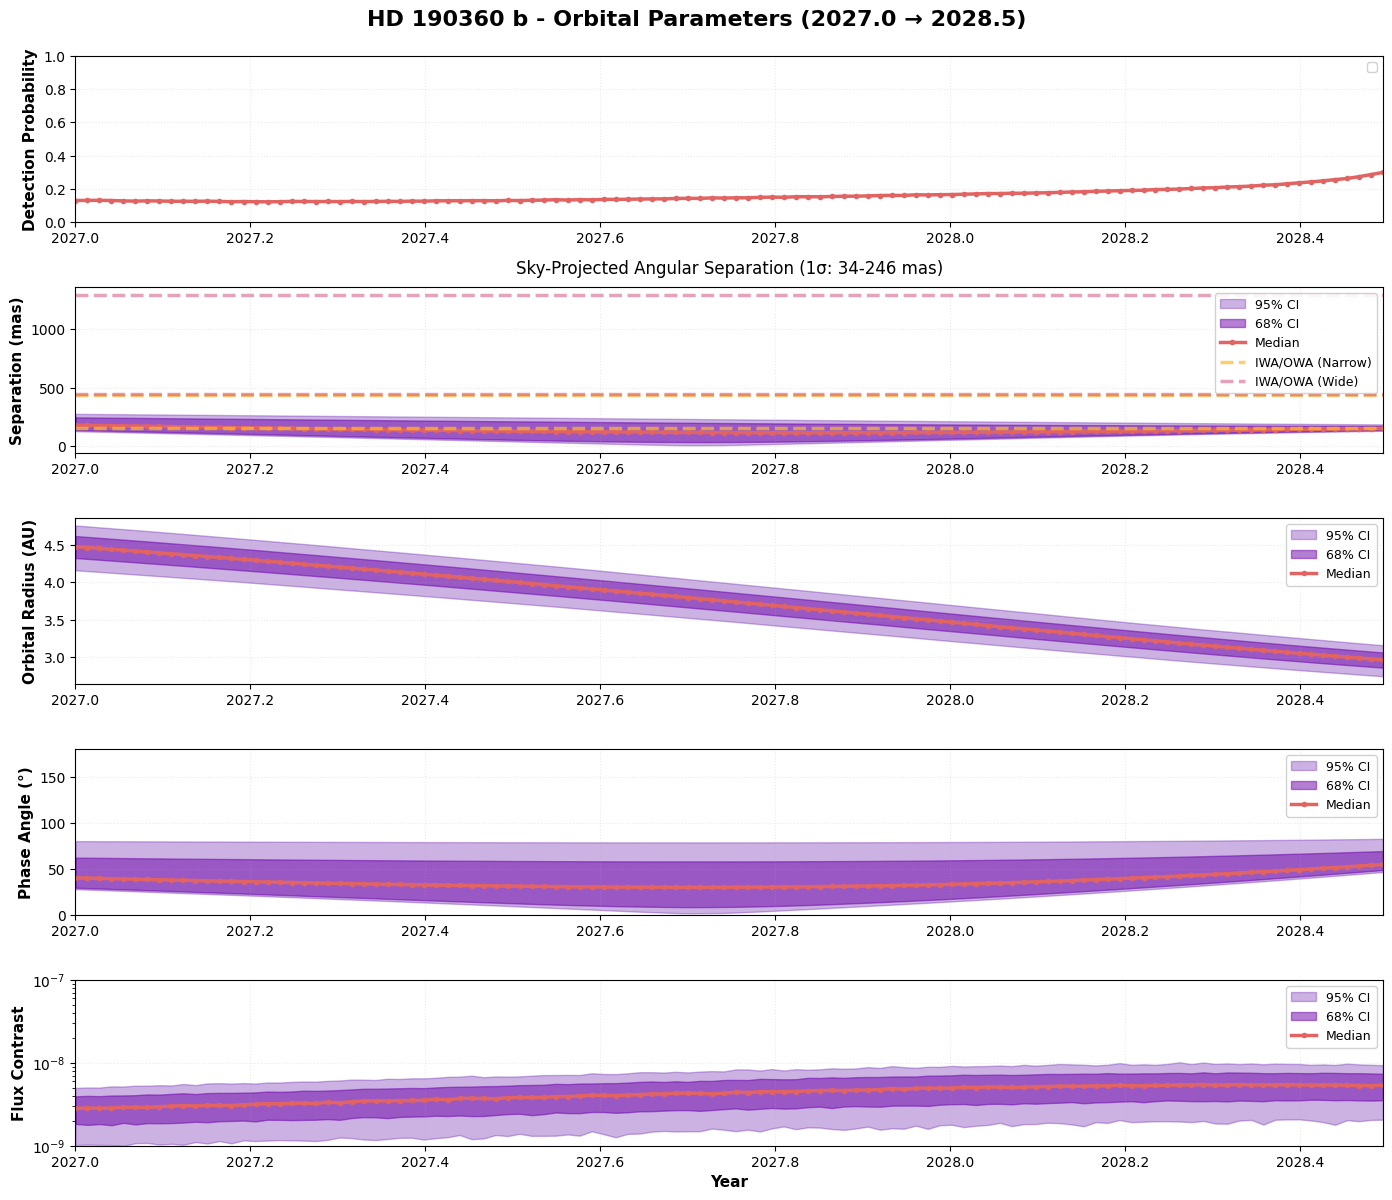

Planet index 11/14: HD_217107_c
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_217107_c_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 4.96 +2.93/-0.60 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 89.93 [47.27, 132.49] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_217107_c_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob 0.02 on 2027-01-16
Peak det prob 0.01 on 2027-07-05
Peak det prob 0.01 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_217107_c_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


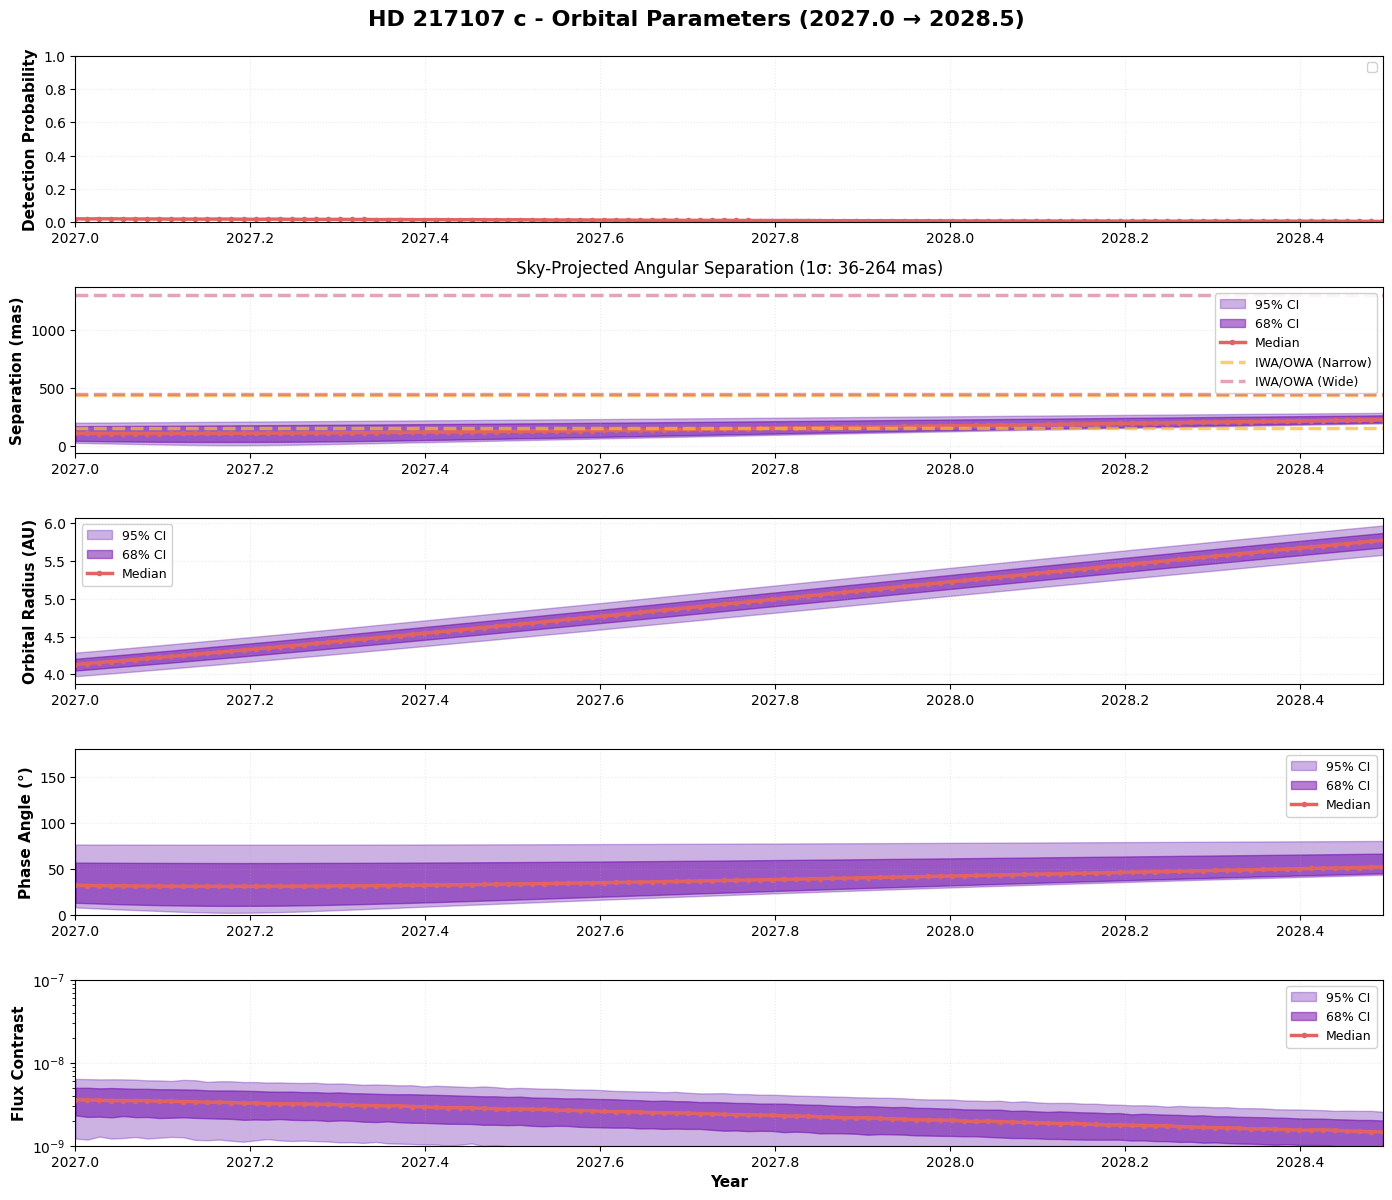

Planet index 12/14: pi_Men_b
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/pi_Men_b_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 11.62 +6.51/-1.73 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.53 [47.96, 133.21] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/pi_Men_b_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob 0.00 on 2027-04-11
Peak det prob 0.00 on 2027-12-12
Peak det prob 0.00 on 2028-06-04
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/pi_Men_b_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


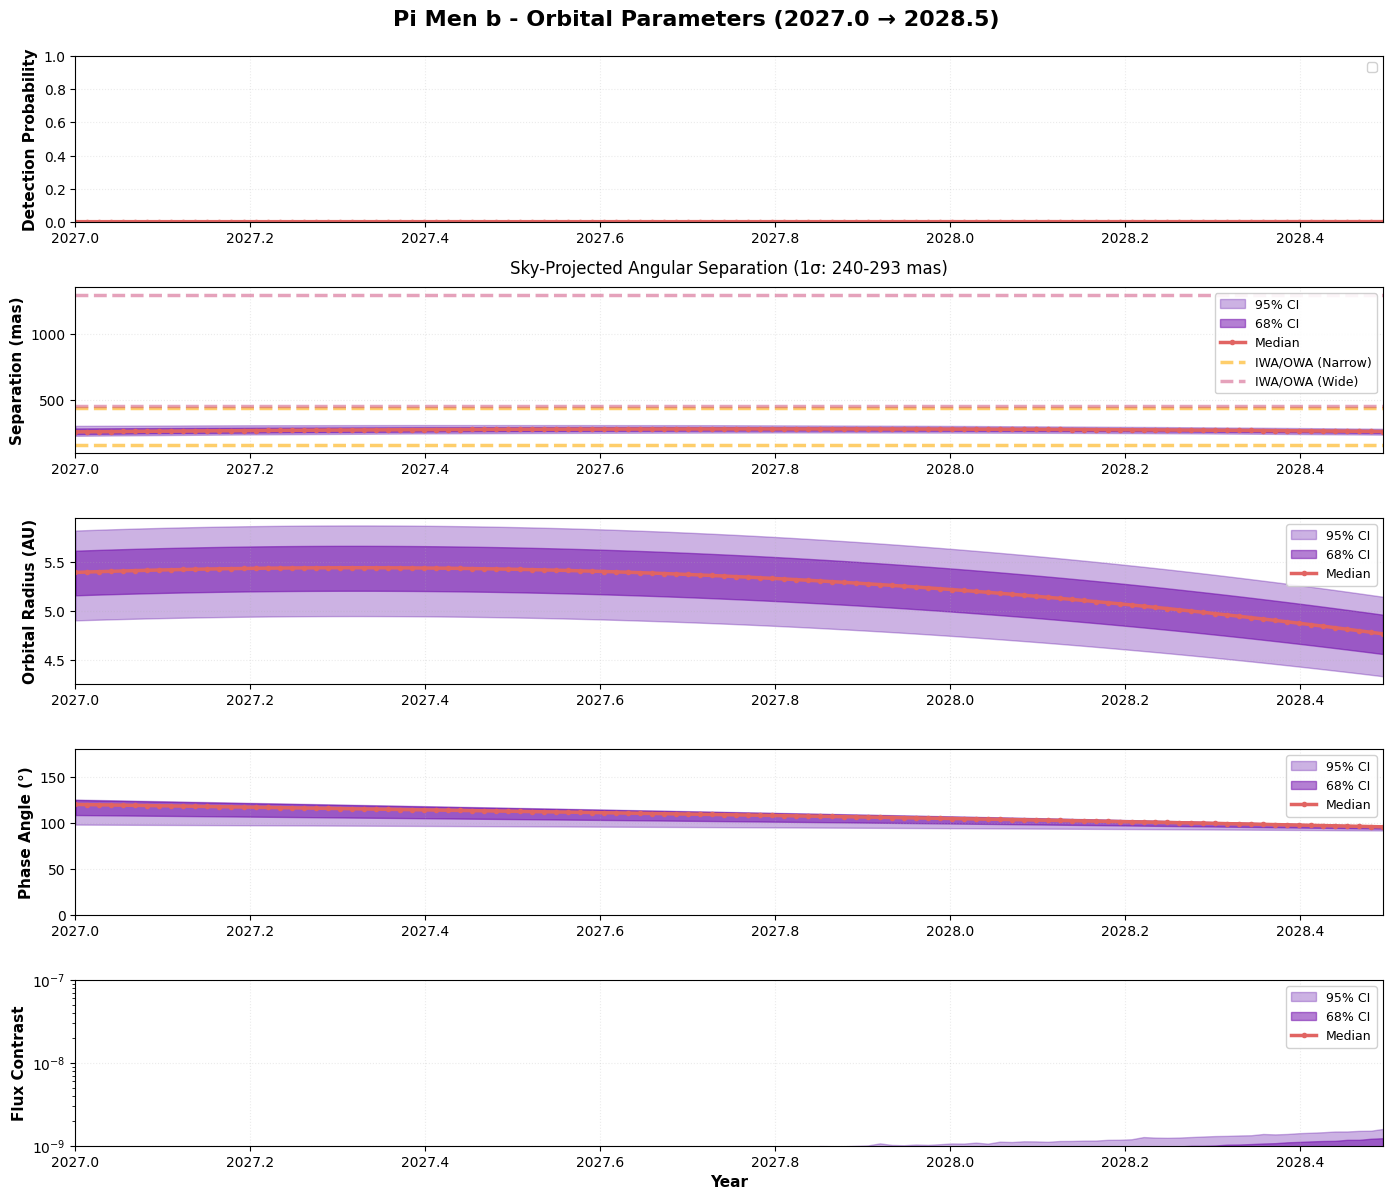

Planet index 13/14: ups_And_d
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/ups_And_d_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 4.59 +2.67/-0.55 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.46 [47.78, 132.91] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/ups_And_d_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob 0.68 on 2027-02-05
Peak det prob 0.75 on 2027-12-27
Peak det prob 0.86 on 2028-01-06
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/ups_And_d_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


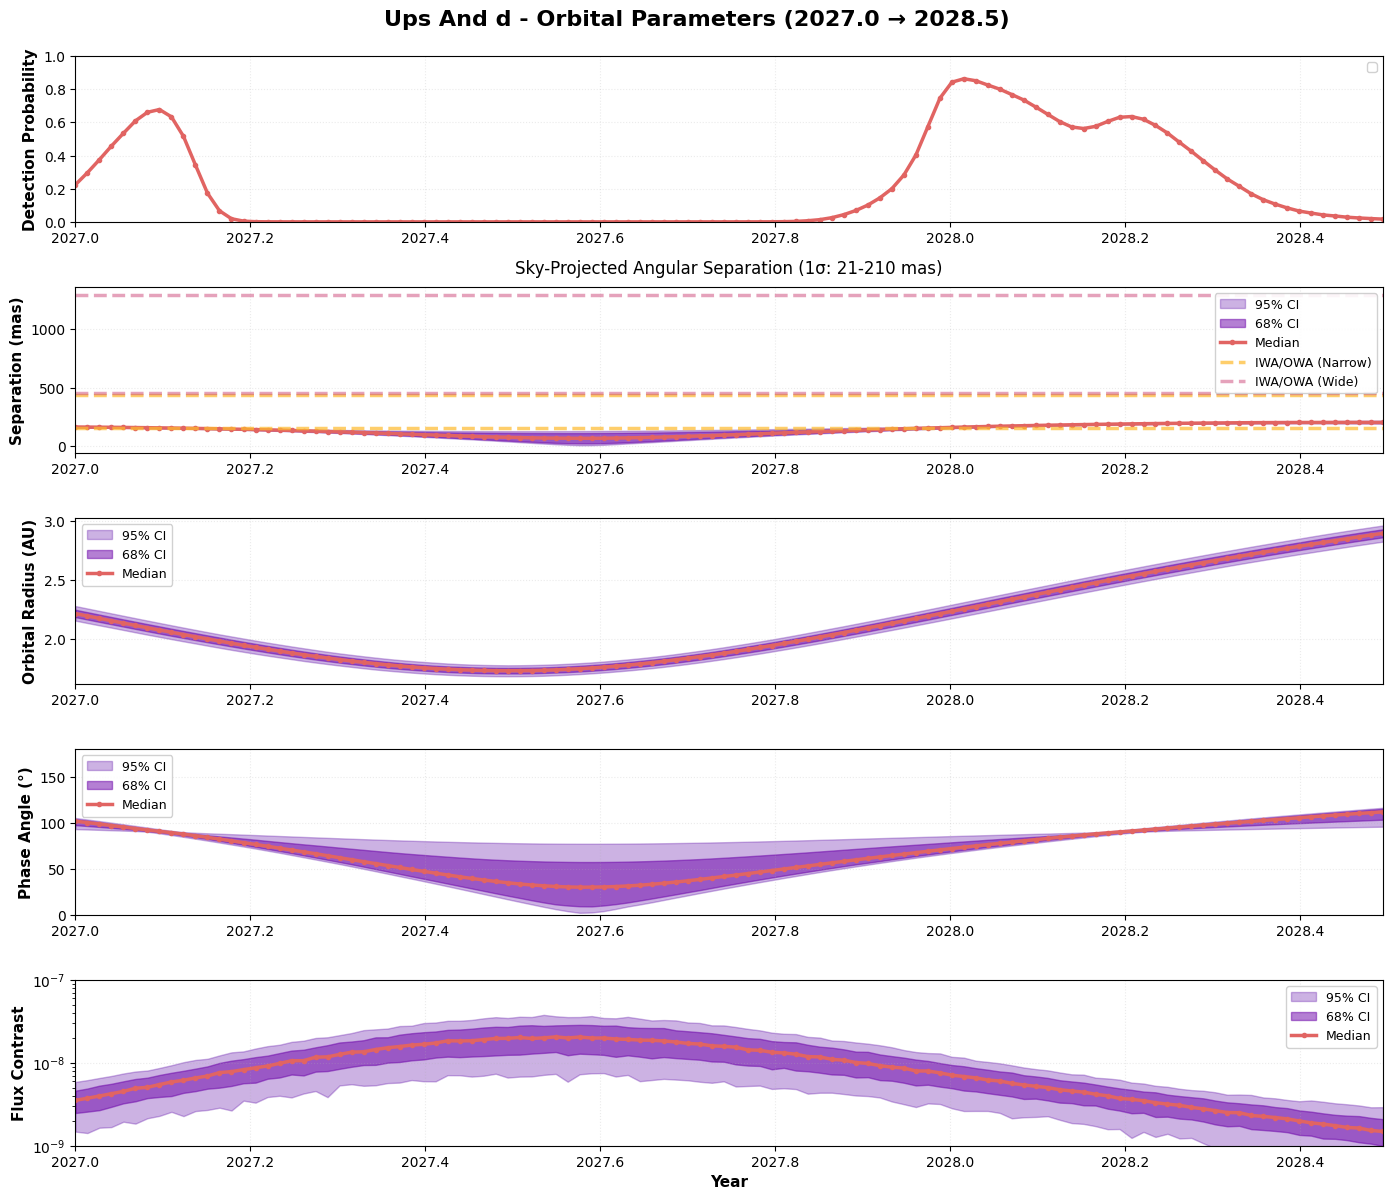

Planet index 14/14: HD_192310_c
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_192310_c_2027-01-01_to_2028-06-30_RVOnly_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 0.08 +0.04/-0.01 M_Jup
Planet radius: 0.38 +0.10/-0.03 R_Jup
Inclination: 90.08 [47.07, 132.80] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_192310_c_2027-01-01_to_2028-06-30_RVOnly_withDetProb.csv...
Peak det prob 0.02 on 2027-06-20
Peak det prob 0.04 on 2027-10-28
Peak det prob 0.02 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/HD_192310_c_2027-01-01_to_2028-06-30_RVOnly_orbital_params.png


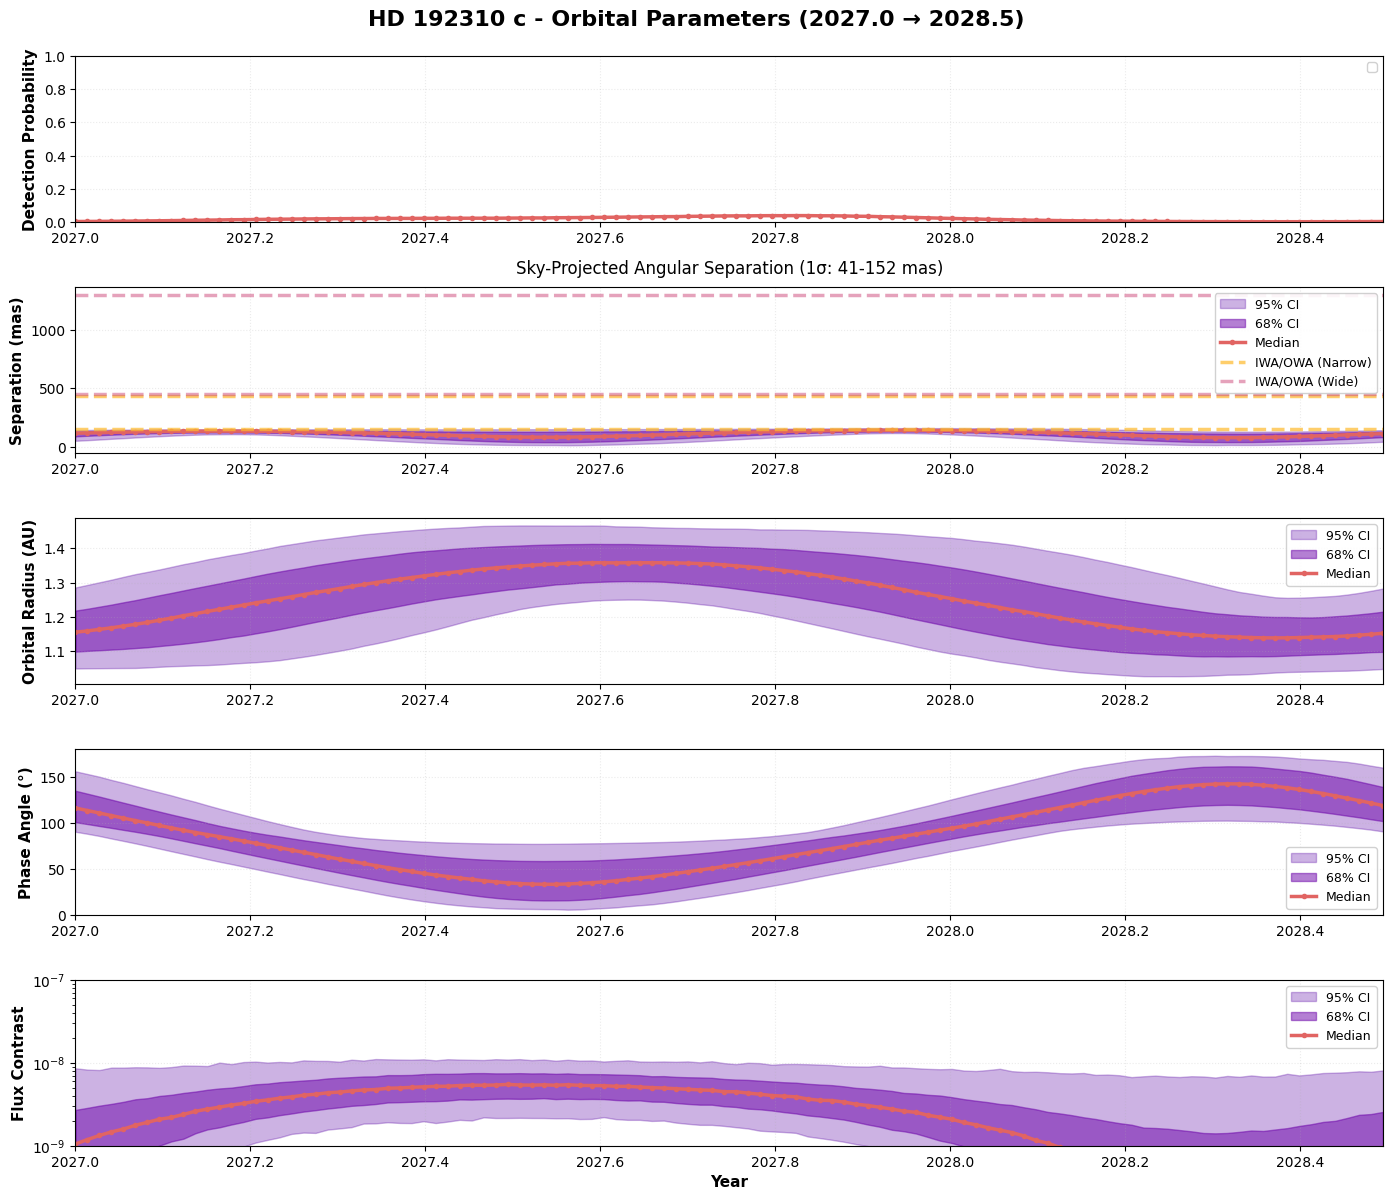

In [5]:
planets = list(orbit_params.keys())
start_date, end_date = "2027-01-01", "2028-06-30"
plot=True
orbit_props_dir = '/Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_radvel/'

# Temporary while we wait for albedos from Dmitry
albedo_med = 0.33 # From jupiter albedo, Lacy&Burrows 2019 https://arxiv.org/pdf/1911.10585
albedo_std = 0.1

semesters = [
    ("2027-01-01", "2027-06-30"),
    ("2027-07-01", "2027-12-31"),
    ("2028-01-01", "2028-06-30"),
]

summary_dict = {
    'planet' : [],
    'peak_pdet_sem1' : [],
    'peak_pdet_sem2' : [],
    'peak_pdet_sem3' : [],
    'peak_date_sem1' : [],
    'peak_date_sem2' : [],
    'peak_date_sem3' : [],
    'mean_pdet_sem1' : [],
    'mean_pdet_sem2' : [],
    'mean_pdet_sem3' : [],
    'sep_range_sem1' : [],
    'sep_range_sem2' : [],
    'sep_range_sem3' : [],
    'fc_range_sem1' : [],
    'fc_range_sem2' : [],
    'fc_range_sem3' : [],
    'mag_range_sem1' : [],
    'mag_range_sem2' : [],
    'mag_range_sem3' : [],
}

for p,planet in enumerate(planets):

    fname_base = f"{planet}_{start_date}_to_{end_date}_RVOnly"
    # Load saved point cloud
    print(f'Planet index {p}/{len(planets)-1}: {planet}')
    point_cloud_fname = f"{fname_base}_PointCloud.pkl"
    point_cloud = load_point_cloud(planet,
                     i_dir=orbit_props_dir,
                     fname=point_cloud_fname
                     )
    
    # Calculate flux contrast (TODO: Update to use albedos/phasecurve from dmitry)
    print('Calculating flux contrast & detectability...')
    albedos = np.random.normal(albedo_med,albedo_std,size=point_cloud['sep_mas'].shape)
    phase_angle_rad = point_cloud['phase_angle_deg'] * np.pi / 180.
    point_cloud['lambert_phase'] = (np.sin(phase_angle_rad)+(np.pi-phase_angle_rad)*np.cos(phase_angle_rad))/np.pi
    point_cloud['phi_x_a'] = point_cloud['lambert_phase'] * albedos
    
    point_cloud['flux_contrast'] = point_cloud['phi_x_a'] * (point_cloud['r_pl_rjup']*u.R_jup.to(u.AU) / point_cloud['orbital_radius_au'])**2

    point_cloud['is_detectable'] = is_detectable(point_cloud['sep_mas'],
                                                 point_cloud['flux_contrast'],
                                                 concurve)
     
    point_cloud['detection_probability'] = weighted_mean(point_cloud['is_detectable'],
                                                      weights=point_cloud['ln_likelihood'])
    
    # Calculate Observation windows
    print('Getting target observation windows')
    times = Time(point_cloud['epoch_mjd'][:,0],format='mjd')
    sun_ang_ref = get_GB_sunang(times)
    point_cloud['GB_not_observable'] = ~((sun_ang_ref.to_value(u.deg) > 54) & (sun_ang_ref.to_value(u.deg) < 126))
    star = orbit_params[planet]['star']
    sun_ang_targ = get_targ_sunang(star,times)
    point_cloud['targ_observable'] = (sun_ang_targ.to_value(u.deg) > 54) & (sun_ang_targ.to_value(u.deg) < 126)    

    # Update summary csv
    print('Updating summary csv.')
    csv_data = gen_summary_csv(
        planet,
        point_cloud,
        orbit_props_dir,
        fname_base+'_withDetProb')   
    
    # Calculate stats for each semester
    summary_dict['planet'].append(planet)
    for s,semester in enumerate(semesters):

        # Get the sections of the table in just the semester of interest
        snum=s+1
        s_start, s_end = Time(list(semester))
        dates_iso = Time(list(csv_data.date_iso.values))
        sem_df = csv_data.loc[(dates_iso>s_start) & (dates_iso<s_end)]

        peak_pdet = f"{np.max(sem_df.det_probability):.2f}"
        peak_date = sem_df.date_iso.iloc[np.argmax(sem_df.det_probability)][:10]
        mean_pdet = f"{np.mean(sem_df.det_probability):.2f}"
        sep_range = f'{np.round(np.min(sem_df.separation_mas_16th),0)} - {np.round(np.max(sem_df.separation_mas_84th),0)}'
        fc_range = '%.2E'%Decimal(np.min(sem_df.flux_contrast_16th)) + ' - ' + '%.2E'%Decimal(np.max(sem_df.flux_contrast_84th))

        print(f'Peak det prob {peak_pdet} on {peak_date}')

        summary_dict[f'peak_pdet_sem{snum}'].append(peak_pdet)
        summary_dict[f'peak_date_sem{snum}'].append(peak_date)
        summary_dict[f'mean_pdet_sem{snum}'].append(mean_pdet)
        summary_dict[f'sep_range_sem{snum}'].append(sep_range)
        summary_dict[f'fc_range_sem{snum}'].append(fc_range)
        summary_dict[f'mag_range_sem{snum}'].append(None)

    print('Plotting...')
    plot_outfpath = os.path.join(orbit_props_dir,fname_base)
    plot_orbital_parameters(planet,csv_data,plot_outfpath,
                                override_lan=0.,
                                start_date=start_date,end_date=end_date,
                                figsize=None,fig_ext='png',
                                show_plots=True,)





In [6]:
# Display detection probabilities in format expected by wiki pages
planet_order = [
    '47 UMa b',
    '47 UMa c',
    '47 UMa d',
    'HD 190360 b',
    '55 Cnc d',
    'HD 160691 c',
    'HD 154345 b',
    '14 Her b',
    '14 Her c',
    'ups And d',
    'HD 217107 c',
    'eps Eri b',
    'pi Men b',
    'HD 192310 c',
    'HD 134987 c',
    'HD 87883 b',
    'HD 114783 c',
]

alltargs_df = pd.DataFrame(summary_dict)

alltargs_table = Table.from_pandas(alltargs_df)
display(alltargs_table['planet','peak_pdet_sem1','peak_pdet_sem2','peak_pdet_sem3'])

def extract_single_targ_pdet_summary(alltargs_df,planet_index):
    columns = ['mean_pdet','peak_pdet_window','separation_range','flux_contrast_range','mag_range']
    singletarg_dict = {}
    for s in range(len(semesters)):
        s += 1
        mean_pdet = alltargs_df.loc[planet_index,f'mean_pdet_sem{s}'].lstrip('-')
        peak_pdetanddate = f"{alltargs_df.loc[planet_index,f'peak_pdet_sem{s}']}, {alltargs_df.loc[planet_index,f'peak_date_sem{s}']}".lstrip('-')

        sep_range = alltargs_df.loc[planet_index,f'sep_range_sem{s}']
        fc_range = alltargs_df.loc[planet_index,f'fc_range_sem{s}']
        mag_range = alltargs_df.loc[planet_index,f'mag_range_sem{s}']
        singletarg_dict[s] = [mean_pdet,peak_pdetanddate,sep_range,fc_range,mag_range]
    singletarg_df = pd.DataFrame.from_dict(singletarg_dict,orient='index',columns=columns)
    
    return singletarg_df

temp = alltargs_df.set_index('planet')
temp.sort_values('peak_pdet_sem1',ascending=False,inplace=True)

for p in temp.index:
    print(p)
    p = '_'.join(p.split(' '))
    if p in temp.index:
        singletarg_df = extract_single_targ_pdet_summary(temp,p)
        singletargs_table = Table.from_pandas(singletarg_df)
        display(singletargs_table)


<Table length=15>
   planet   peak_pdet_sem1 peak_pdet_sem2 peak_pdet_sem3
   str11         str5           str5           str5     
----------- -------------- -------------- --------------
   47_UMa_c           0.20           0.29           0.30
   47_UMa_b           0.00           0.01           0.00
   47_UMa_d          -0.00          -0.00          -0.00
   55_Cnc_d          -0.00          -0.00          -0.00
  eps_Eri_b           0.24           0.06           0.00
 HD_87883_b           0.00           0.00           0.00
HD_114783_c           0.00           0.00           0.00
HD_134987_c           0.00           0.00           0.00
HD_154345_b           0.19           0.06           0.00
HD_160691_c           0.00           0.00           0.00
HD_190360_b           0.13           0.16           0.29
HD_217107_c           0.02           0.01           0.01
   pi_Men_b           0.00           0.00           0.00
  ups_And_d           0.68           0.75           0.86
HD_192310_c           0.02           0.04           0.02

ups_And_d


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.15 0.68, 2027-02-05     51.0 - 164.0 2.58E-09 - 2.72E-08        --
     0.07 0.75, 2027-12-27     21.0 - 161.0 5.15E-09 - 2.87E-08        --
     0.44 0.86, 2028-01-06    154.0 - 210.0 1.06E-09 - 9.40E-09        --

eps_Eri_b


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str14              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.19 0.24, 2027-02-10   236.0 - 1037.0 2.25E-09 - 5.08E-09        --
     0.01 0.06, 2027-07-05   531.0 - 1104.0 1.96E-09 - 4.70E-09        --
     0.00 0.00, 2028-01-01   839.0 - 1163.0 1.59E-09 - 3.94E-09        --

47_UMa_c


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.17 0.20, 2027-06-20     56.0 - 255.0 1.79E-09 - 3.78E-09        --
     0.25 0.29, 2027-12-27    113.0 - 254.0 1.78E-09 - 3.79E-09        --
     0.28 0.30, 2028-01-31    179.0 - 253.0 1.72E-09 - 3.77E-09        --

HD_154345_b


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.14 0.19, 2027-01-06    173.0 - 218.0 1.33E-09 - 3.87E-09        --
     0.02 0.06, 2027-07-05    201.0 - 222.0 7.86E-10 - 2.59E-09        --
     0.00 0.00, 2028-01-01    181.0 - 221.0 3.70E-10 - 1.60E-09        --

HD_190360_b


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str12              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.12 0.13, 2027-01-11     57.0 - 245.0 1.77E-09 - 5.24E-09        --
     0.15 0.16, 2027-12-27     34.0 - 212.0 2.33E-09 - 7.02E-09        --
     0.20 0.29, 2028-06-24     64.0 - 185.0 3.10E-09 - 7.68E-09        --

HD_217107_c


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.02 0.02, 2027-01-16     36.0 - 194.0 1.79E-09 - 5.00E-09        --
     0.01 0.01, 2027-07-05     67.0 - 227.0 1.32E-09 - 3.91E-09        --
     0.00 0.01, 2028-01-01    138.0 - 263.0 9.74E-10 - 2.80E-09        --

HD_192310_c


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str12              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.01 0.02, 2027-06-20     48.0 - 144.0 4.11E-10 - 7.51E-09        --
     0.03 0.04, 2027-10-28     41.0 - 152.0 1.15E-09 - 7.50E-09        --
     0.01 0.02, 2028-01-01     41.0 - 150.0 2.58E-11 - 3.85E-09        --

47_UMa_b


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-01-06     25.0 - 138.0 7.11E-09 - 2.13E-08        --
     0.00 0.01, 2027-10-03    124.0 - 147.0 1.52E-09 - 1.36E-08        --
     0.00 0.00, 2028-06-24     26.0 - 140.0 9.04E-12 - 3.43E-09        --

HD_87883_b


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-05-06     74.0 - 309.0 1.77E-12 - 1.67E-10        --
     0.00 0.00, 2027-09-28    102.0 - 318.0 3.79E-12 - 1.63E-10        --
     0.00 0.00, 2028-05-05    130.0 - 323.0 7.36E-12 - 1.67E-10        --

HD_114783_c


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-01-31     58.0 - 213.0 1.31E-09 - 2.92E-09        --
     0.00 0.00, 2027-08-14     98.0 - 225.0 1.17E-09 - 2.73E-09        --
     0.00 0.00, 2028-01-06    144.0 - 239.0 1.01E-09 - 2.34E-09        --

HD_134987_c


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-01-21     67.0 - 248.0 1.67E-12 - 1.35E-10        --
     0.00 0.00, 2027-07-15    100.0 - 253.0 5.34E-12 - 1.47E-10        --
     0.00 0.00, 2028-01-06    134.0 - 258.0 1.34E-11 - 1.66E-10        --

HD_160691_c


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-05-01     55.0 - 263.0 1.55E-12 - 2.58E-10        --
     0.00 0.00, 2027-07-10    136.0 - 283.0 2.16E-11 - 3.57E-10        --
     0.00 0.00, 2028-01-16    214.0 - 306.0 8.91E-11 - 5.30E-10        --

pi_Men_b


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-04-11    241.0 - 292.0 1.97E-10 - 5.77E-10        --
     0.00 0.00, 2027-12-12    262.0 - 293.0 2.72E-10 - 7.85E-10        --
     0.00 0.00, 2028-06-04    249.0 - 290.0 3.96E-10 - 1.21E-09        --

47_UMa_d


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str14              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-01-06   481.0 - 1482.0 5.91E-11 - 1.90E-10        --
     0.00 0.00, 2027-07-05   468.0 - 1486.0 5.64E-11 - 1.87E-10        --
     0.00 0.00, 2028-01-01   451.0 - 1489.0 5.74E-11 - 1.89E-10        --

55_Cnc_d


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-01-06    116.0 - 426.0 2.60E-12 - 2.92E-10        --
     0.00 0.00, 2027-07-05    179.0 - 433.0 1.15E-11 - 3.20E-10        --
     0.00 0.00, 2028-01-01    252.0 - 440.0 3.43E-11 - 3.74E-10        --

Planet index 0/14: 47_UMa_c
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/47_UMa_c_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 0.55 +0.26/-0.07 M_Jup
Planet radius: 0.87 +0.08/-0.03 R_Jup
Inclination: 90.13 [49.33, 130.46] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/47_UMa_c_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob 0.19 on 2027-06-25
Peak det prob 0.26 on 2027-12-22
Peak det prob 0.26 on 2028-02-20
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/47_UMa_c_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


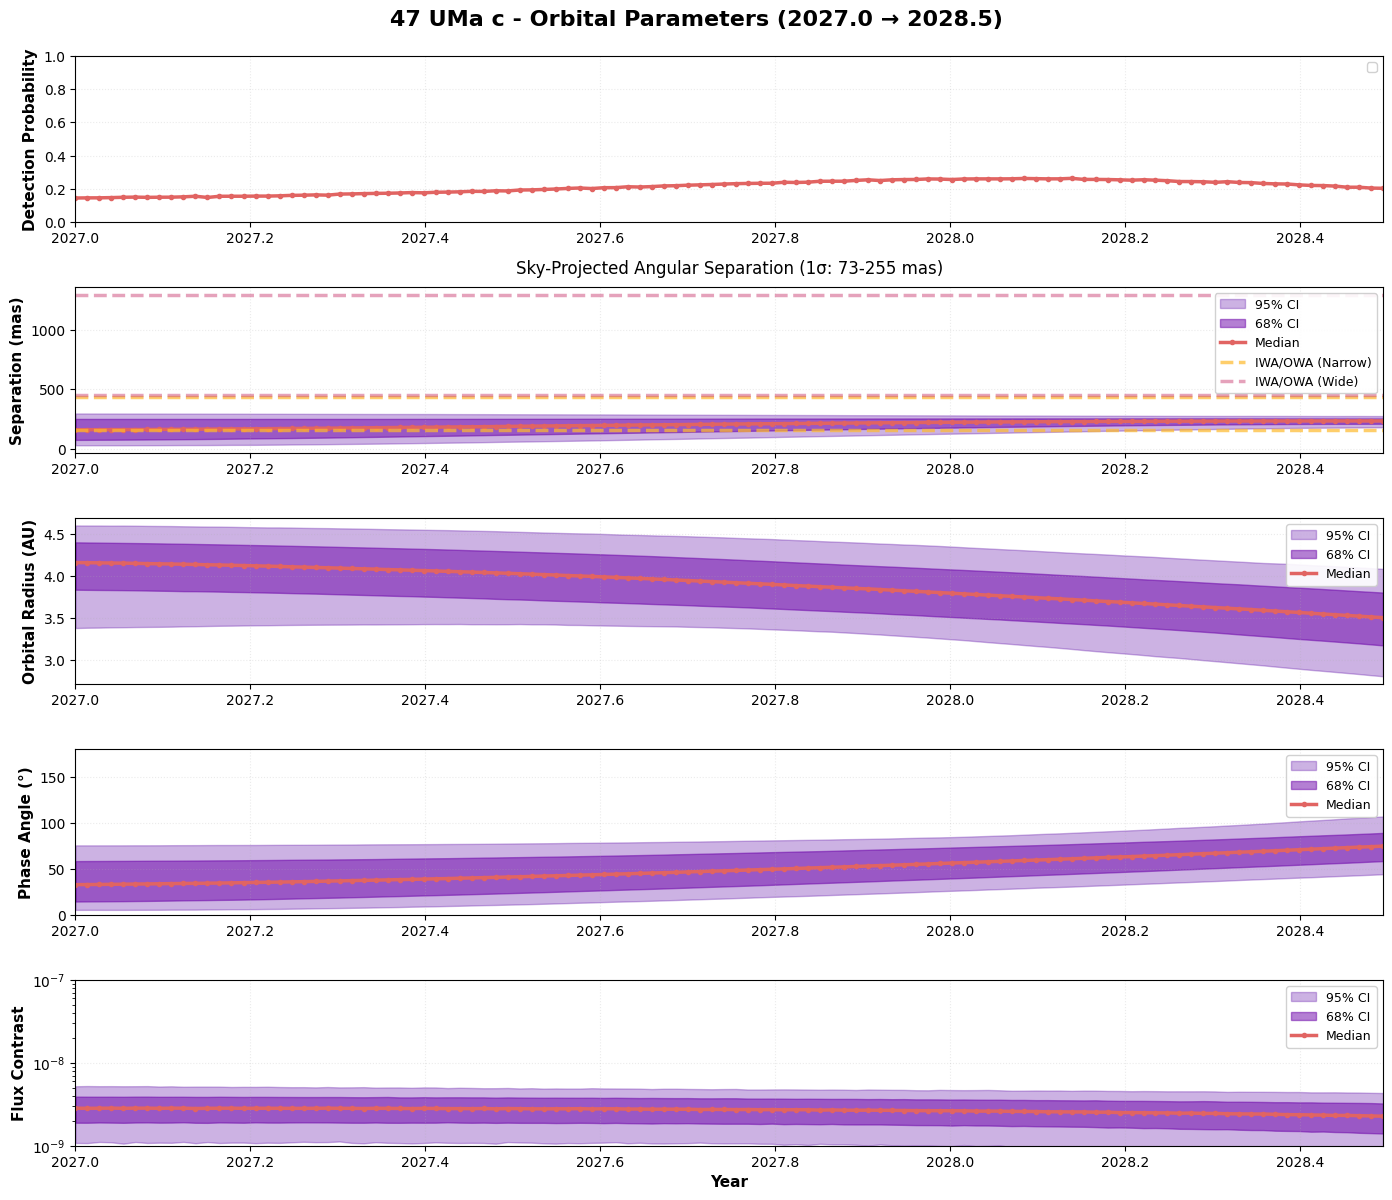

Planet index 1/14: 47_UMa_b
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/47_UMa_b_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 2.62 +0.75/-0.21 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 89.05 [56.00, 122.63] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/47_UMa_b_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob -0.00 on 2027-01-06
Peak det prob 0.00 on 2027-09-28
Peak det prob -0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/47_UMa_b_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


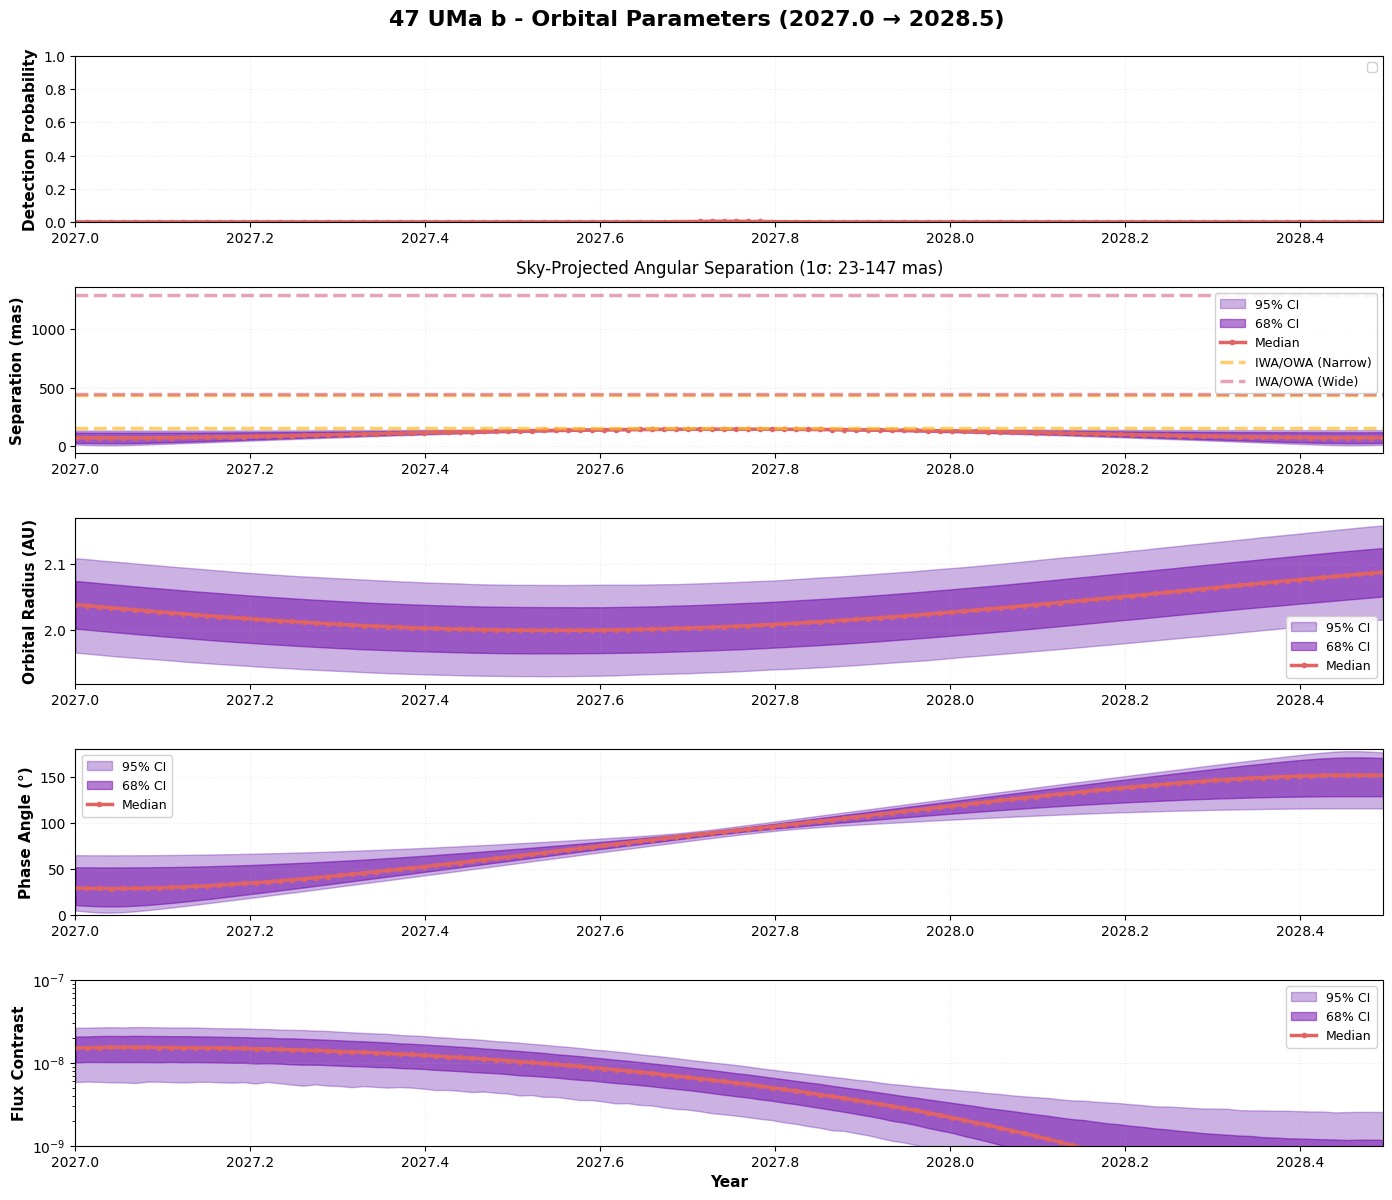

Planet index 2/14: 47_UMa_d
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/47_UMa_d_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 1.68 +0.63/-0.27 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.42 [52.17, 127.47] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/47_UMa_d_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob -0.00 on 2027-01-06
Peak det prob -0.00 on 2027-07-05
Peak det prob -0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/47_UMa_d_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


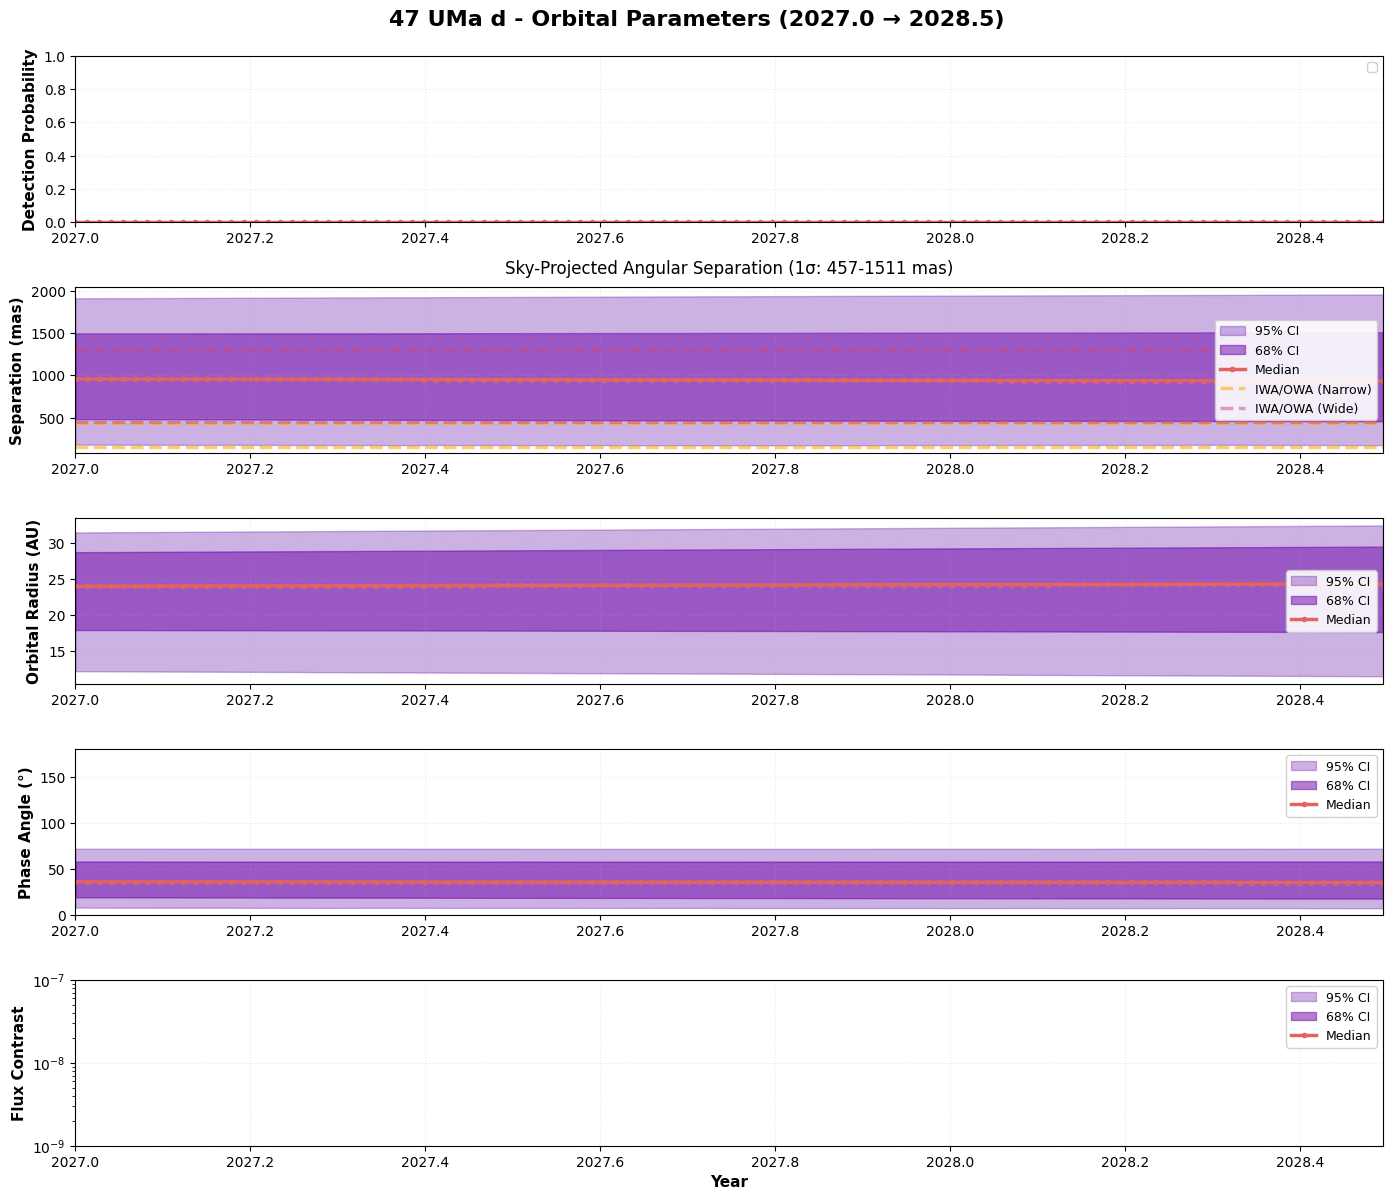

Planet index 3/14: 55_Cnc_d
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/55_Cnc_d_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 3.63 +0.13/-0.12 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 88.65 [80.05, 97.77] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/55_Cnc_d_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob -0.00 on 2027-01-06
Peak det prob -0.00 on 2027-07-05
Peak det prob -0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/55_Cnc_d_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


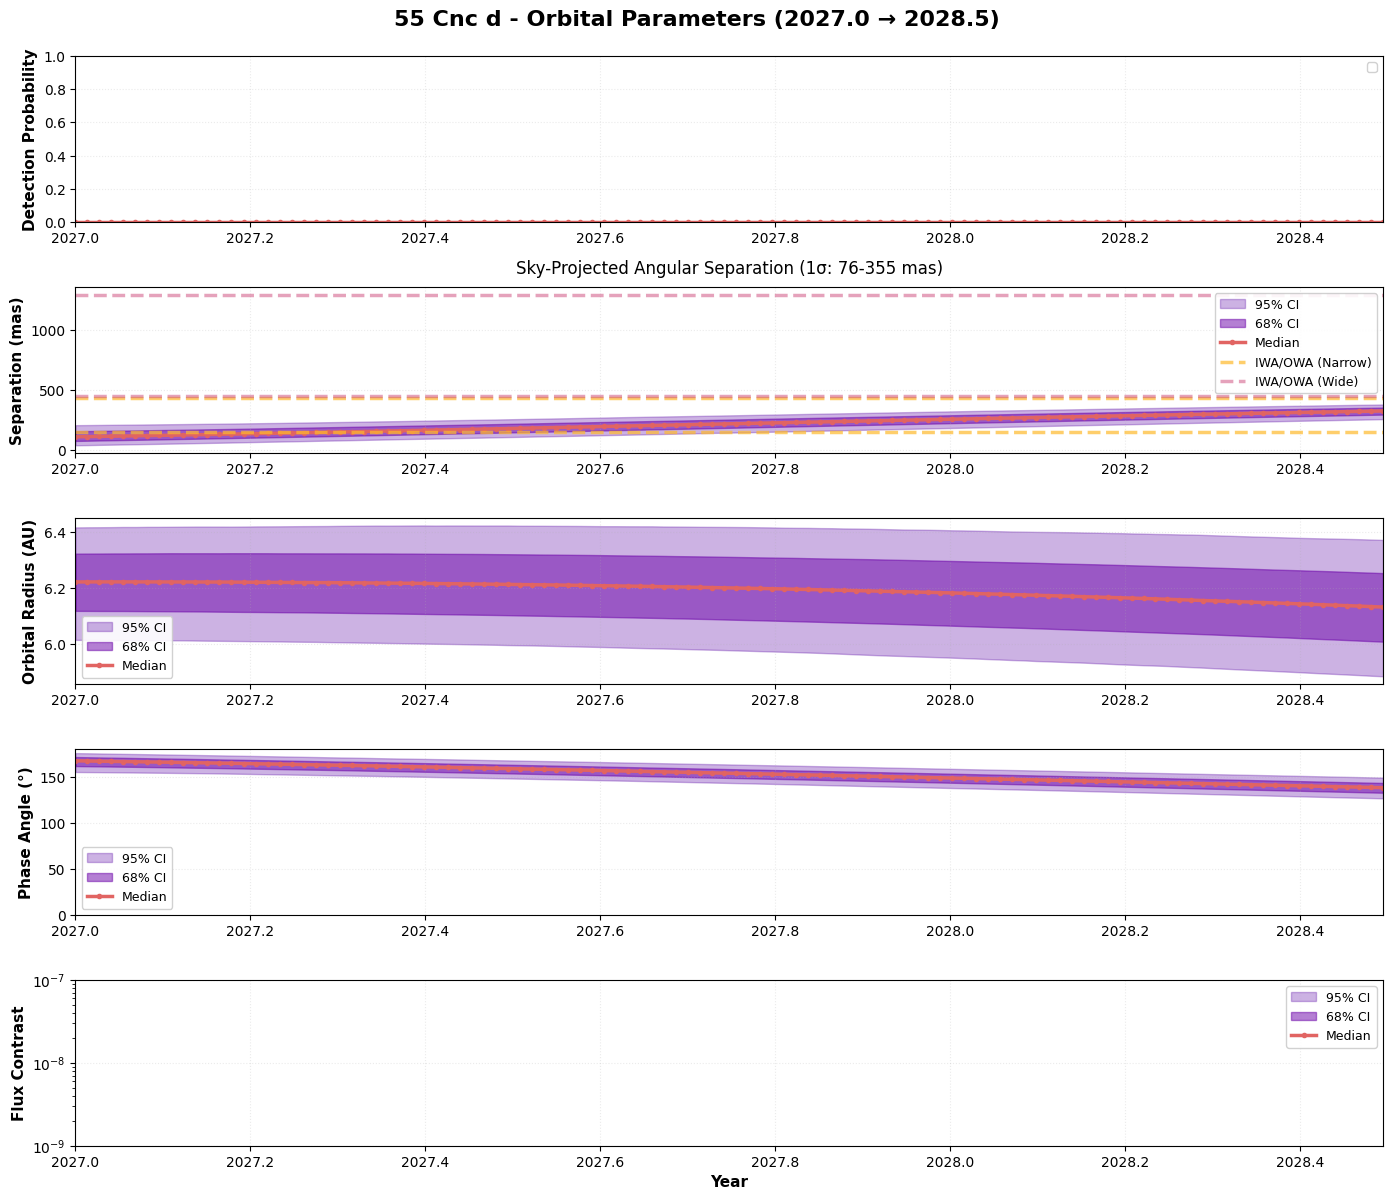

Planet index 4/14: eps_Eri_b
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/eps_Eri_b_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 0.72 +0.22/-0.08 M_Jup
Planet radius: 0.93 +0.06/-0.02 R_Jup
Inclination: 88.36 [51.94, 125.68] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/eps_Eri_b_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob 0.17 on 2027-01-06
Peak det prob 0.04 on 2027-07-05
Peak det prob 0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/eps_Eri_b_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


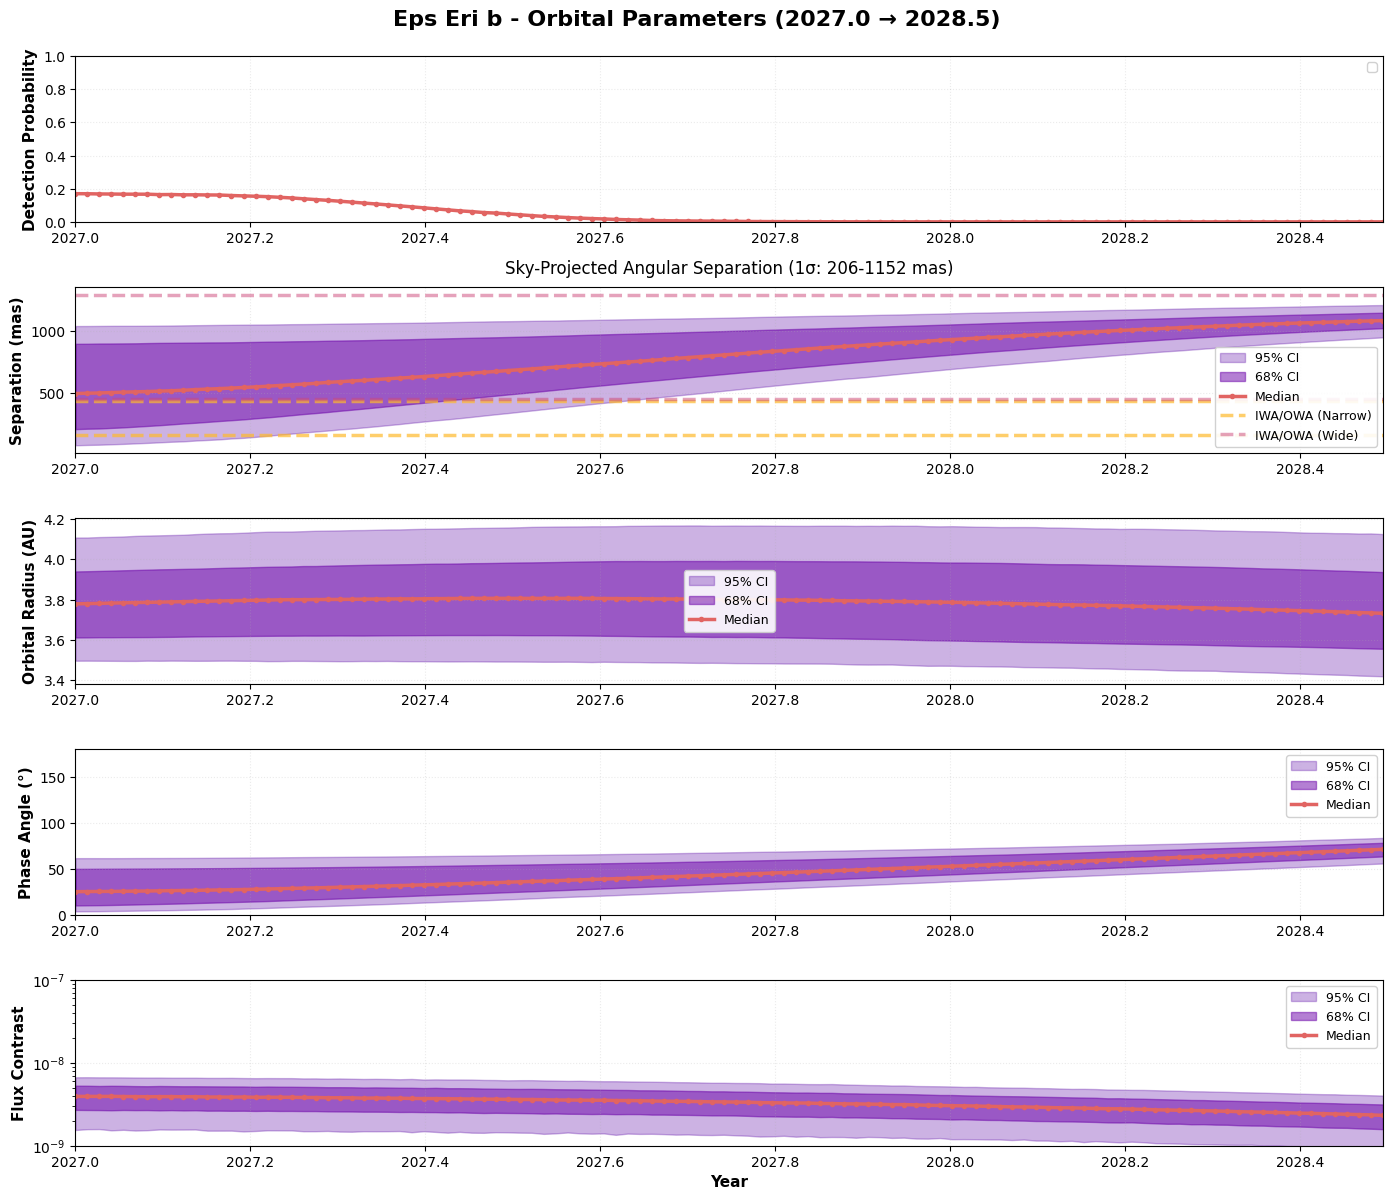

Planet index 5/14: HD_87883_b
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_87883_b_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 5.81 +1.03/-0.66 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 154.83 [19.59, 157.51] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_87883_b_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob -0.00 on 2027-01-06
Peak det prob -0.00 on 2027-07-05
Peak det prob -0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_87883_b_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


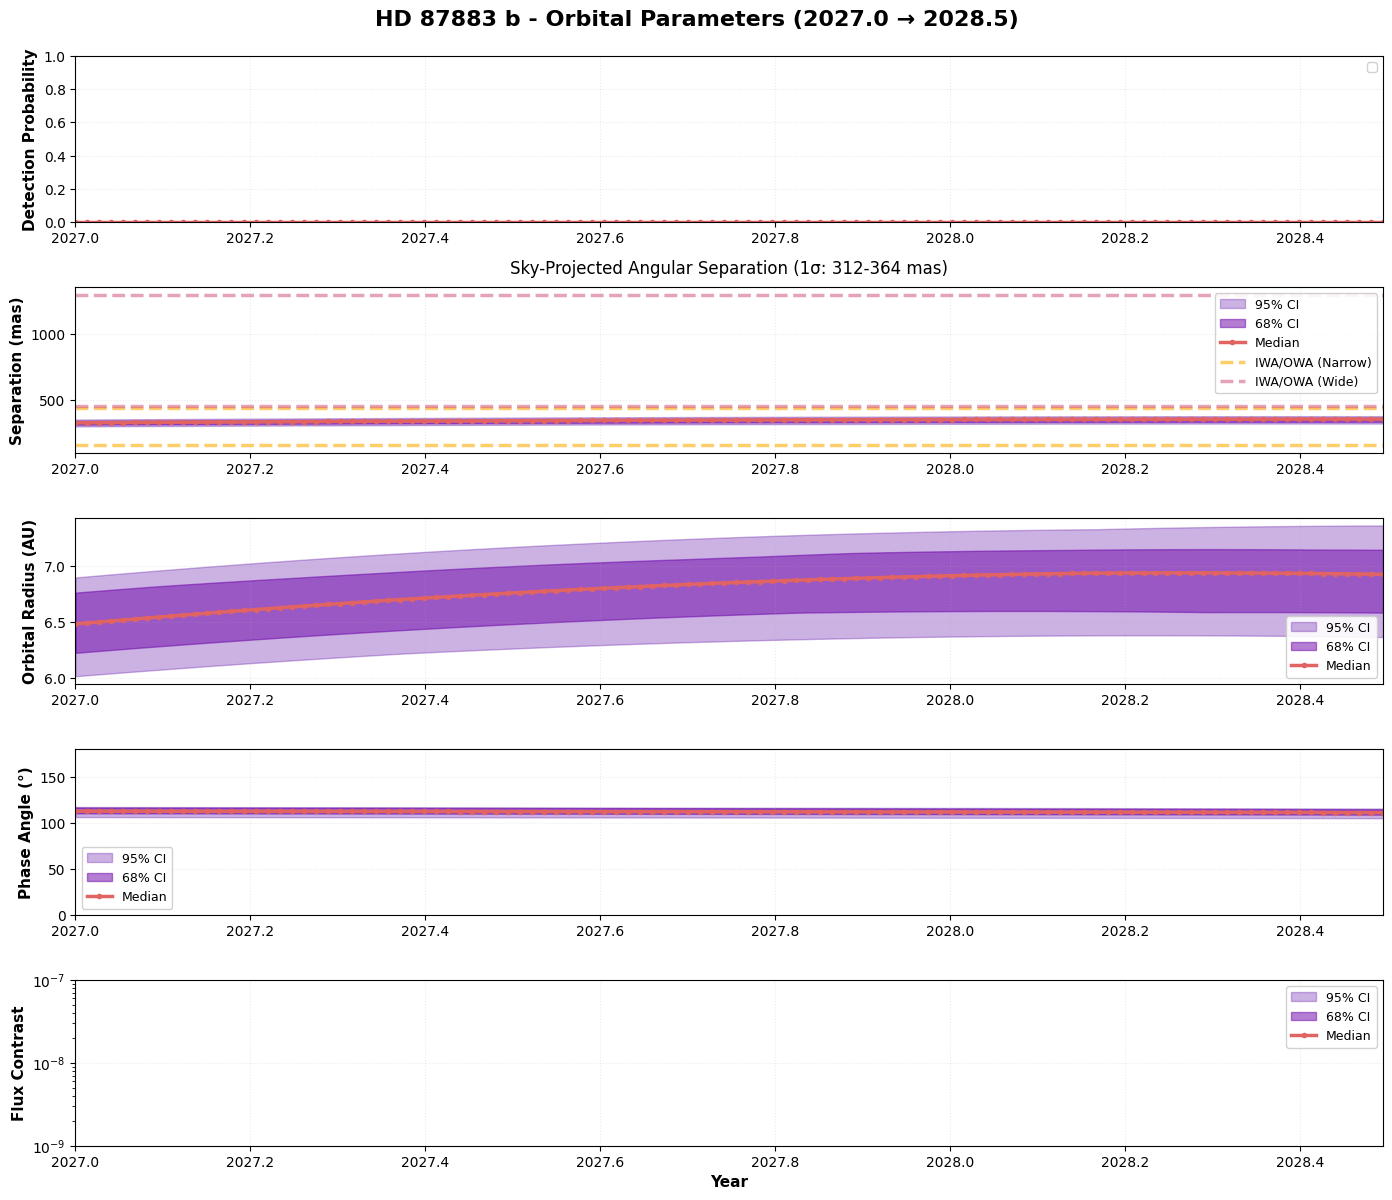

Planet index 6/14: HD_114783_c
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_114783_c_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 0.83 +0.46/-0.13 M_Jup
Planet radius: 0.96 +0.04/-0.04 R_Jup
Inclination: 89.66 [44.04, 137.05] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_114783_c_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob 0.01 on 2027-01-21
Peak det prob 0.01 on 2027-07-25
Peak det prob 0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_114783_c_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


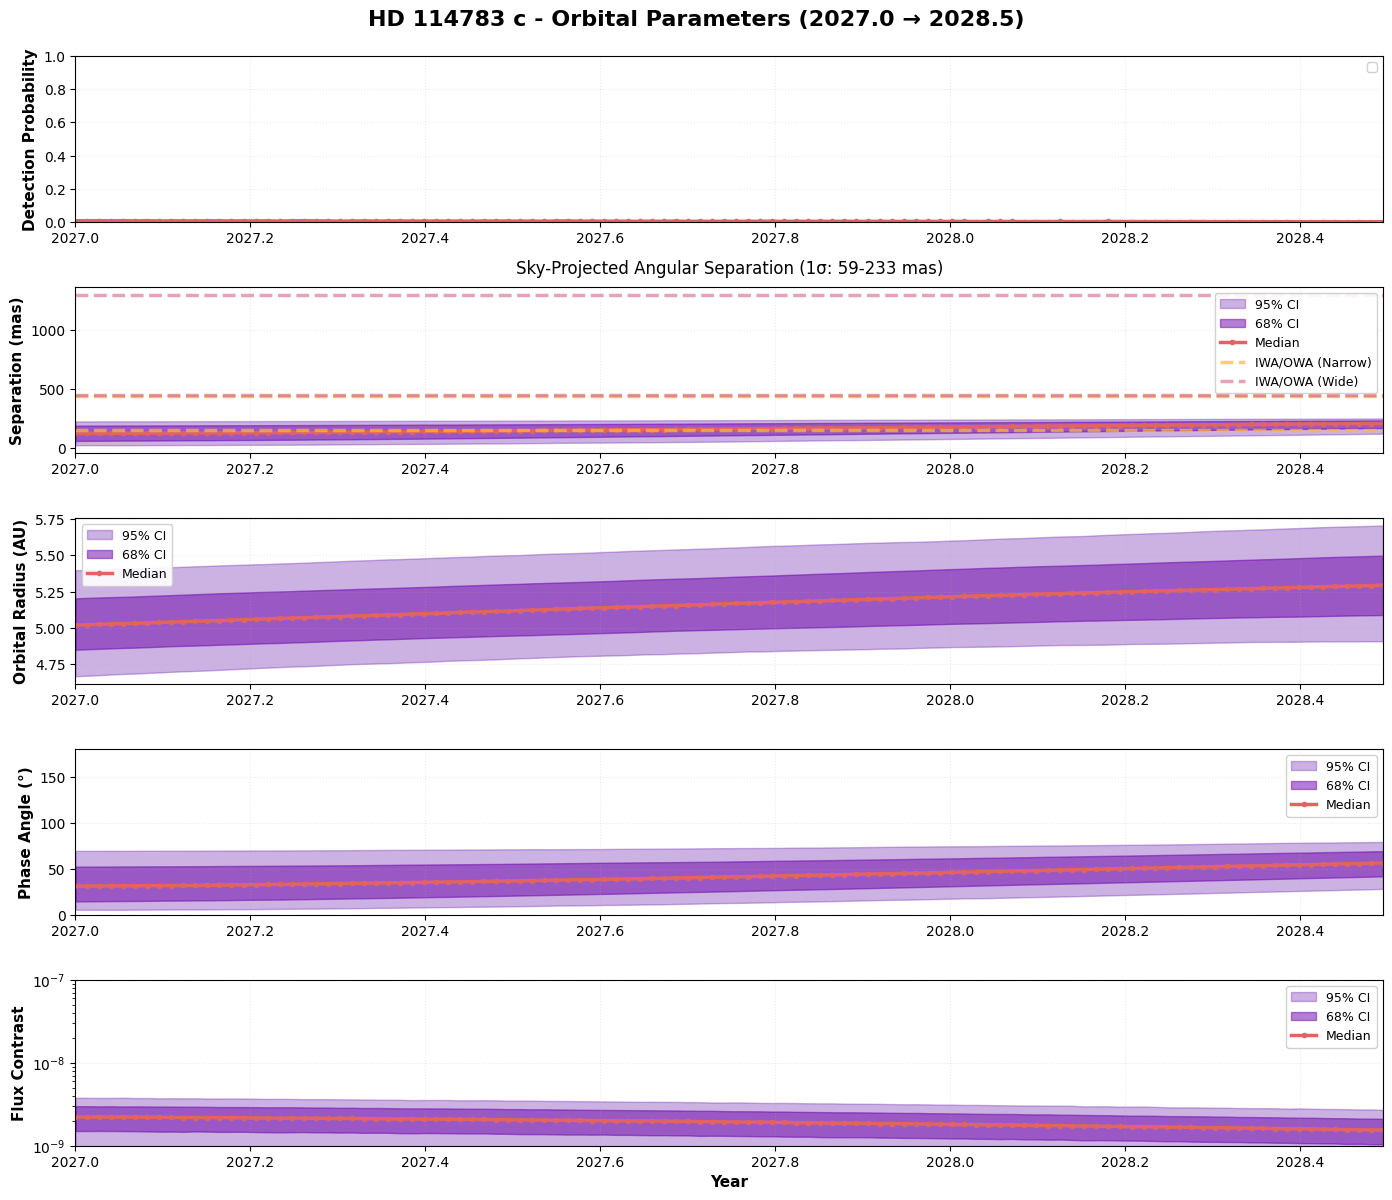

Planet index 7/14: HD_134987_c
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_134987_c_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 1.18 +0.43/-0.11 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.47 [54.42, 126.87] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_134987_c_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob -0.00 on 2027-01-06
Peak det prob -0.00 on 2027-07-05
Peak det prob -0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_134987_c_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


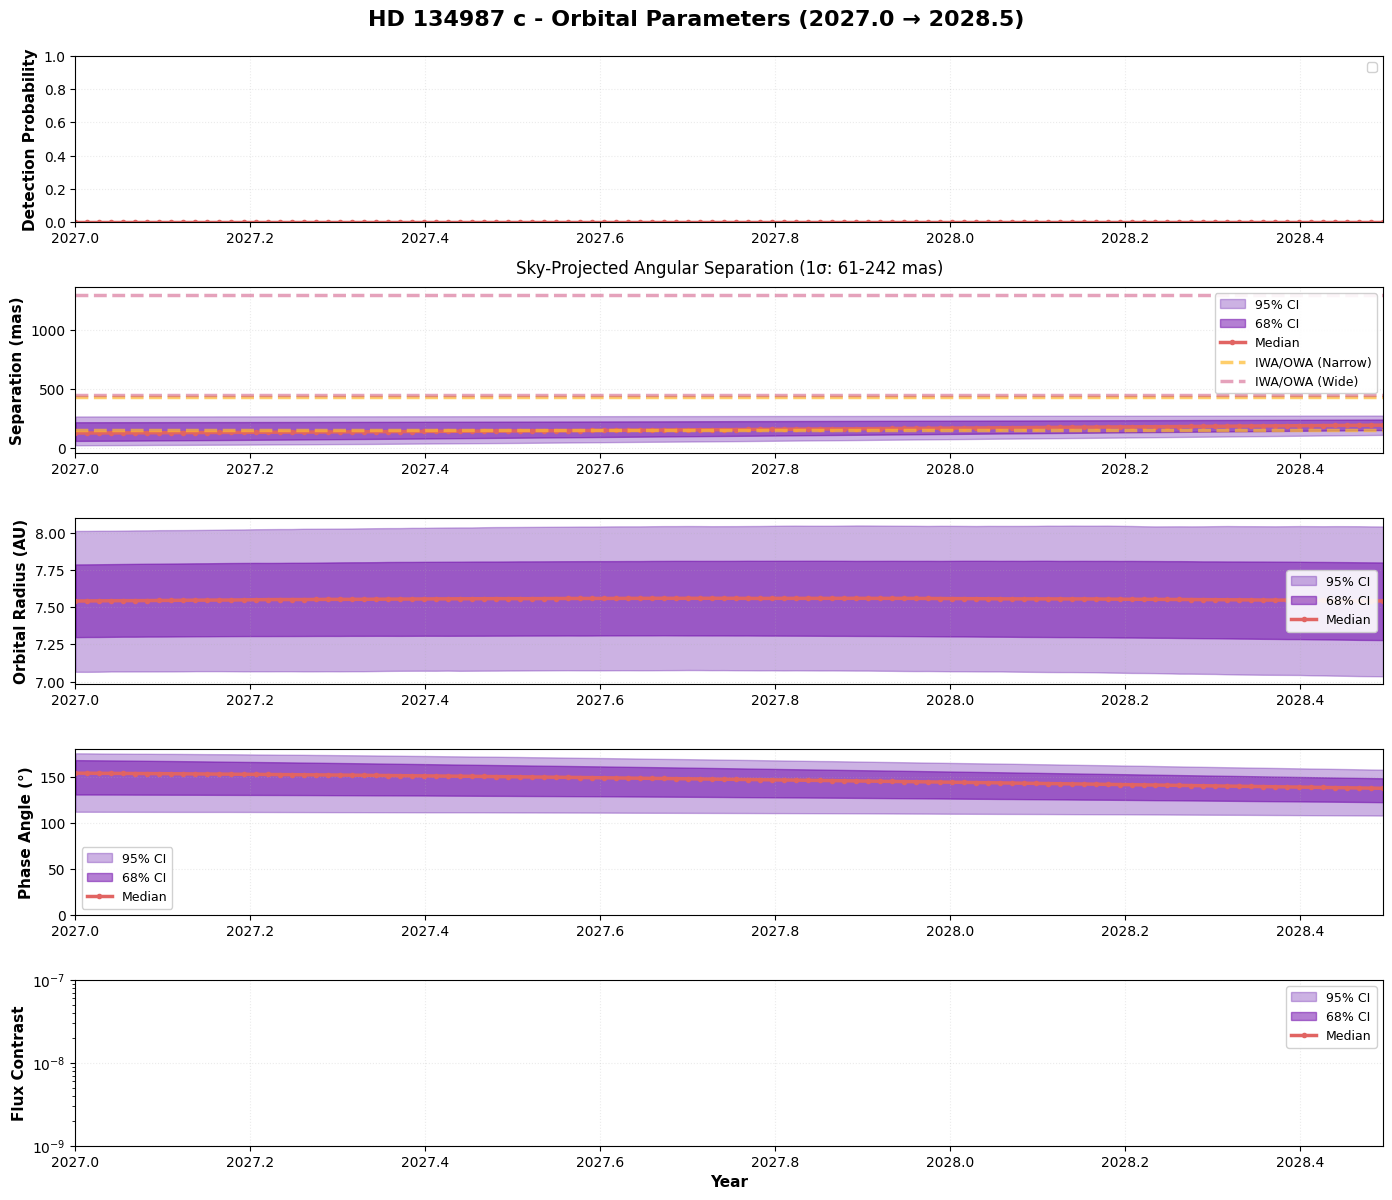

Planet index 8/14: HD_154345_b
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_154345_b_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 1.16 +0.20/-0.11 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 89.80 [63.12, 116.74] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_154345_b_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob 0.22 on 2027-02-10
Peak det prob 0.08 on 2027-07-05
Peak det prob 0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_154345_b_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


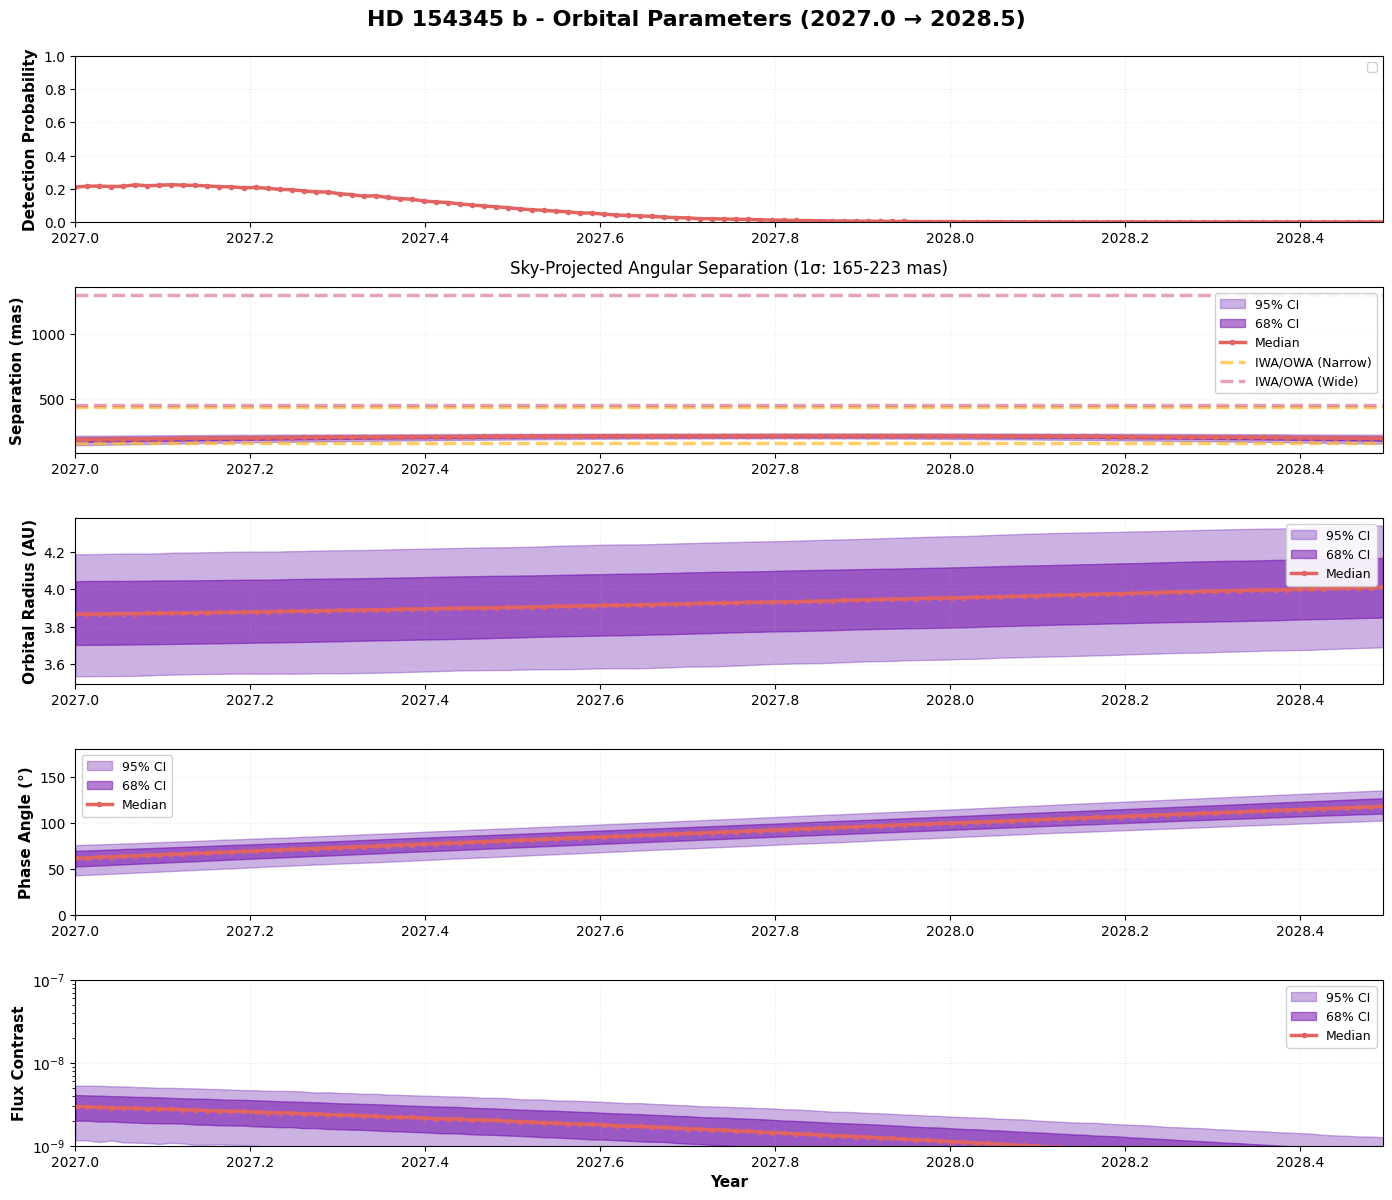

Planet index 9/14: HD_160691_c
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_160691_c_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 1.97 +0.37/-0.11 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 90.92 [61.53, 118.53] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_160691_c_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob -0.00 on 2027-01-06
Peak det prob -0.00 on 2027-07-05
Peak det prob -0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_160691_c_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


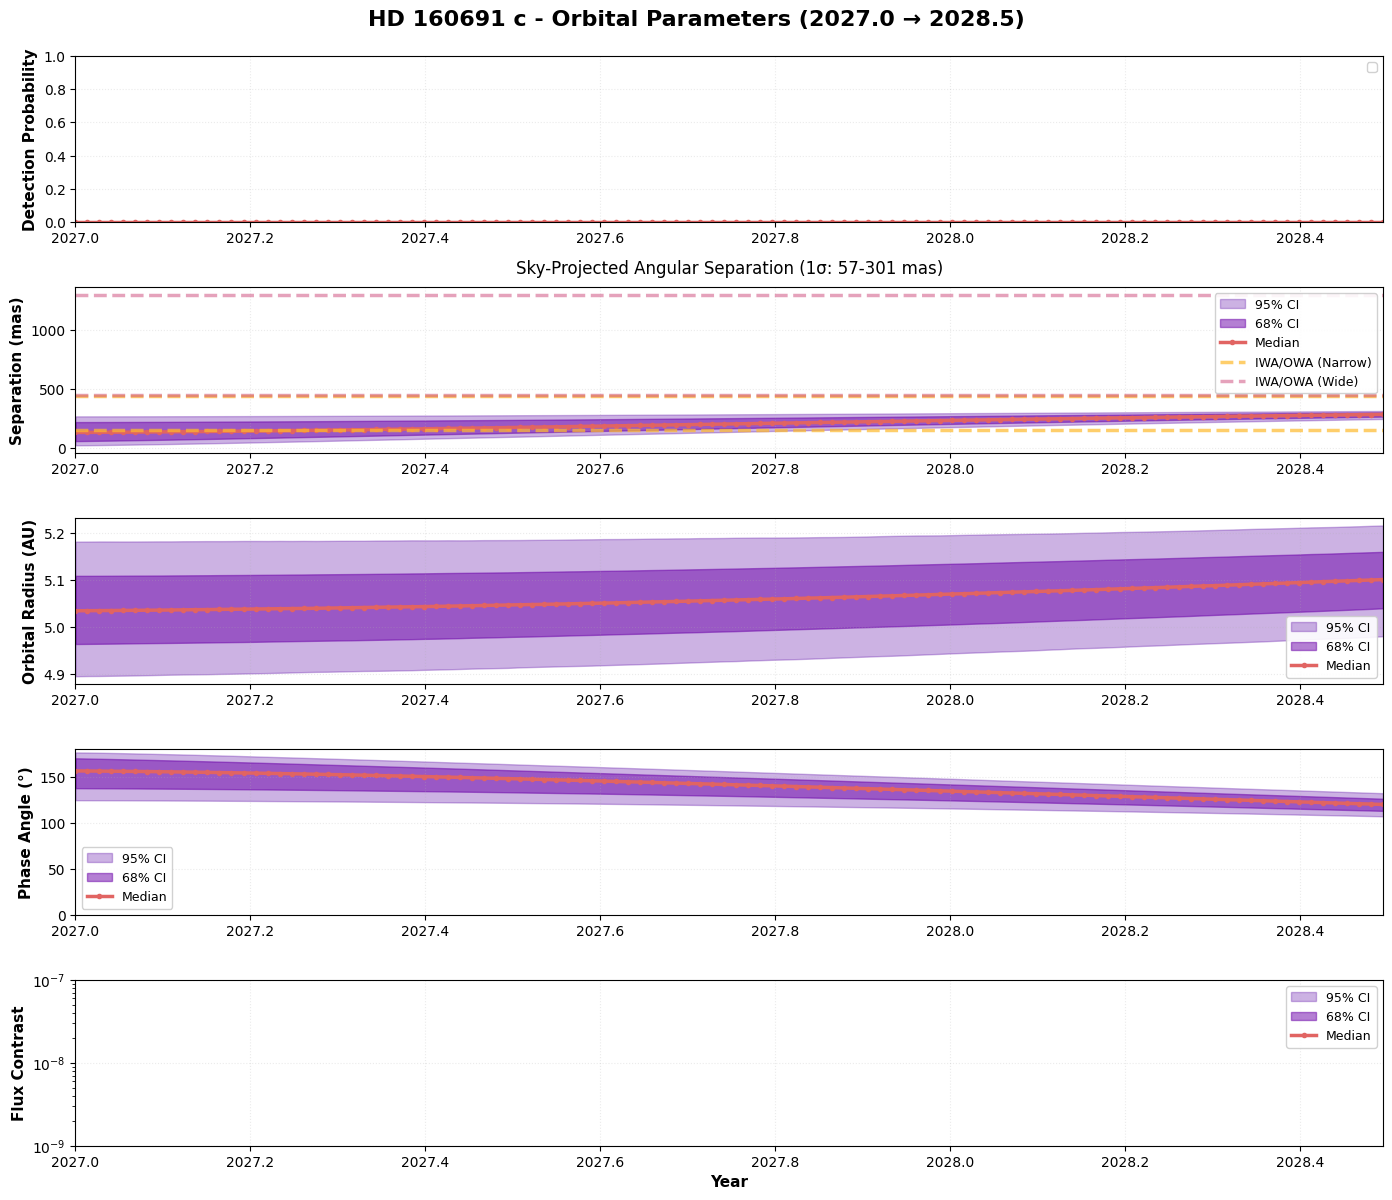

Planet index 10/14: HD_190360_b
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_190360_b_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 1.60 +0.35/-0.10 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 88.39 [59.30, 118.39] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_190360_b_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob 0.17 on 2027-01-11
Peak det prob 0.09 on 2027-07-05
Peak det prob 0.30 on 2028-06-24
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_190360_b_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


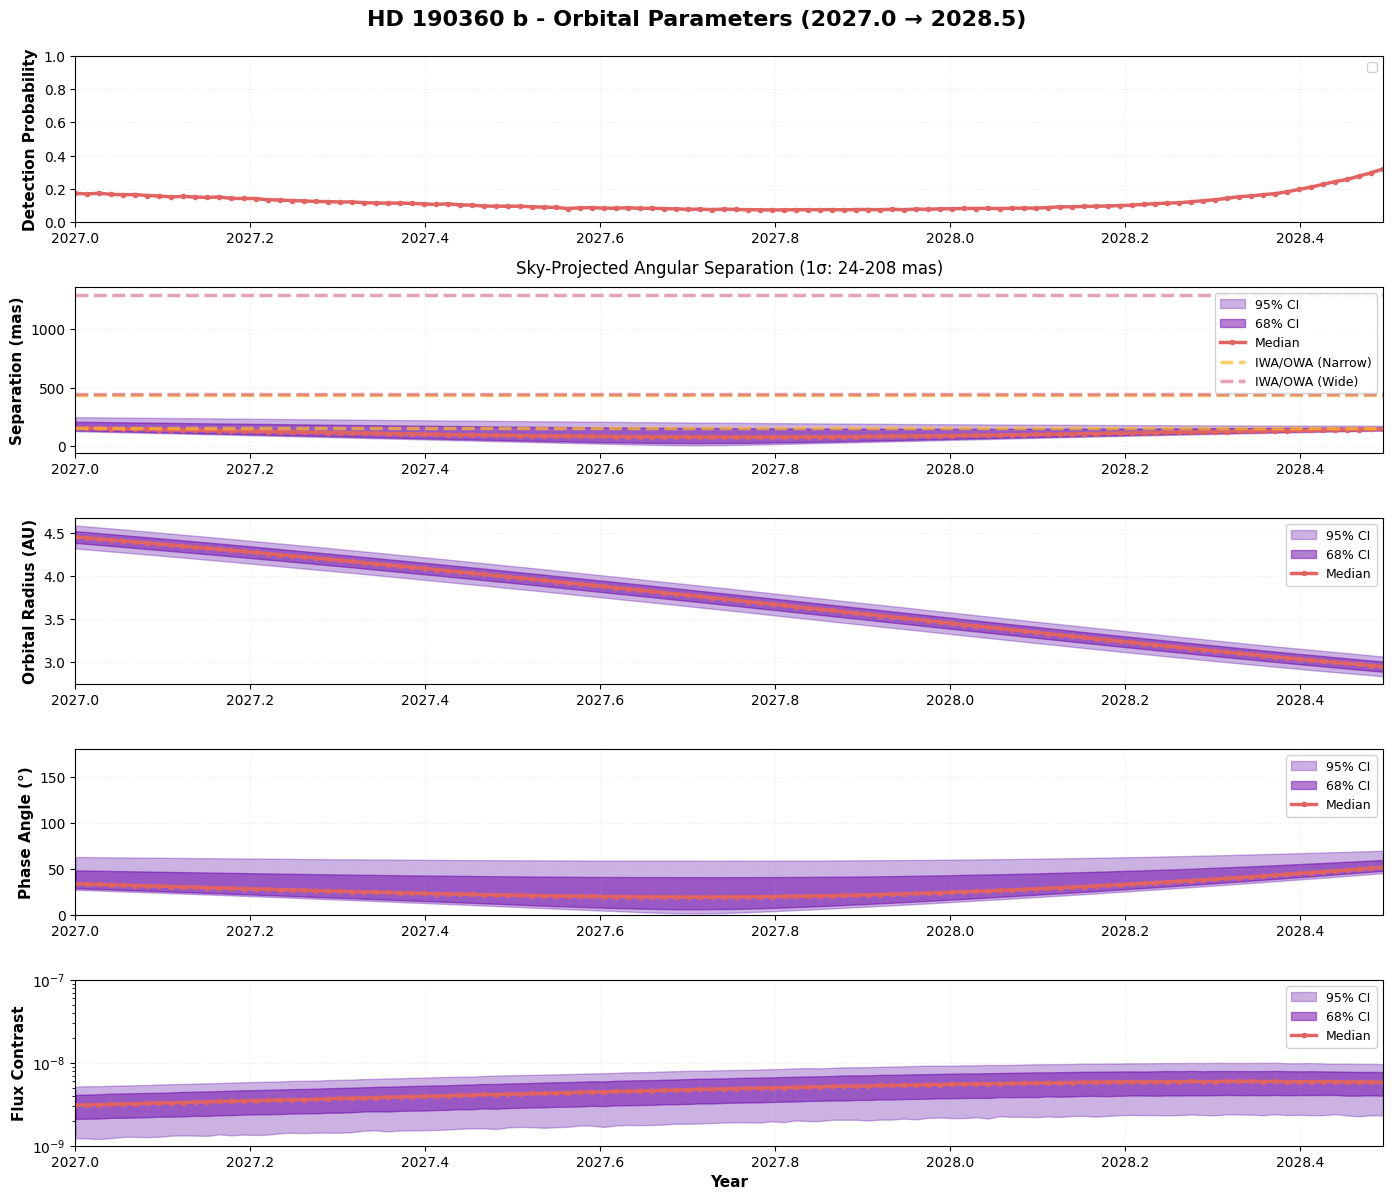

Planet index 11/14: HD_217107_c
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_217107_c_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 4.45 +0.30/-0.20 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 89.48 [70.42, 108.37] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_217107_c_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob 0.00 on 2027-01-11
Peak det prob 0.00 on 2027-12-27
Peak det prob 0.00 on 2028-06-14
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_217107_c_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


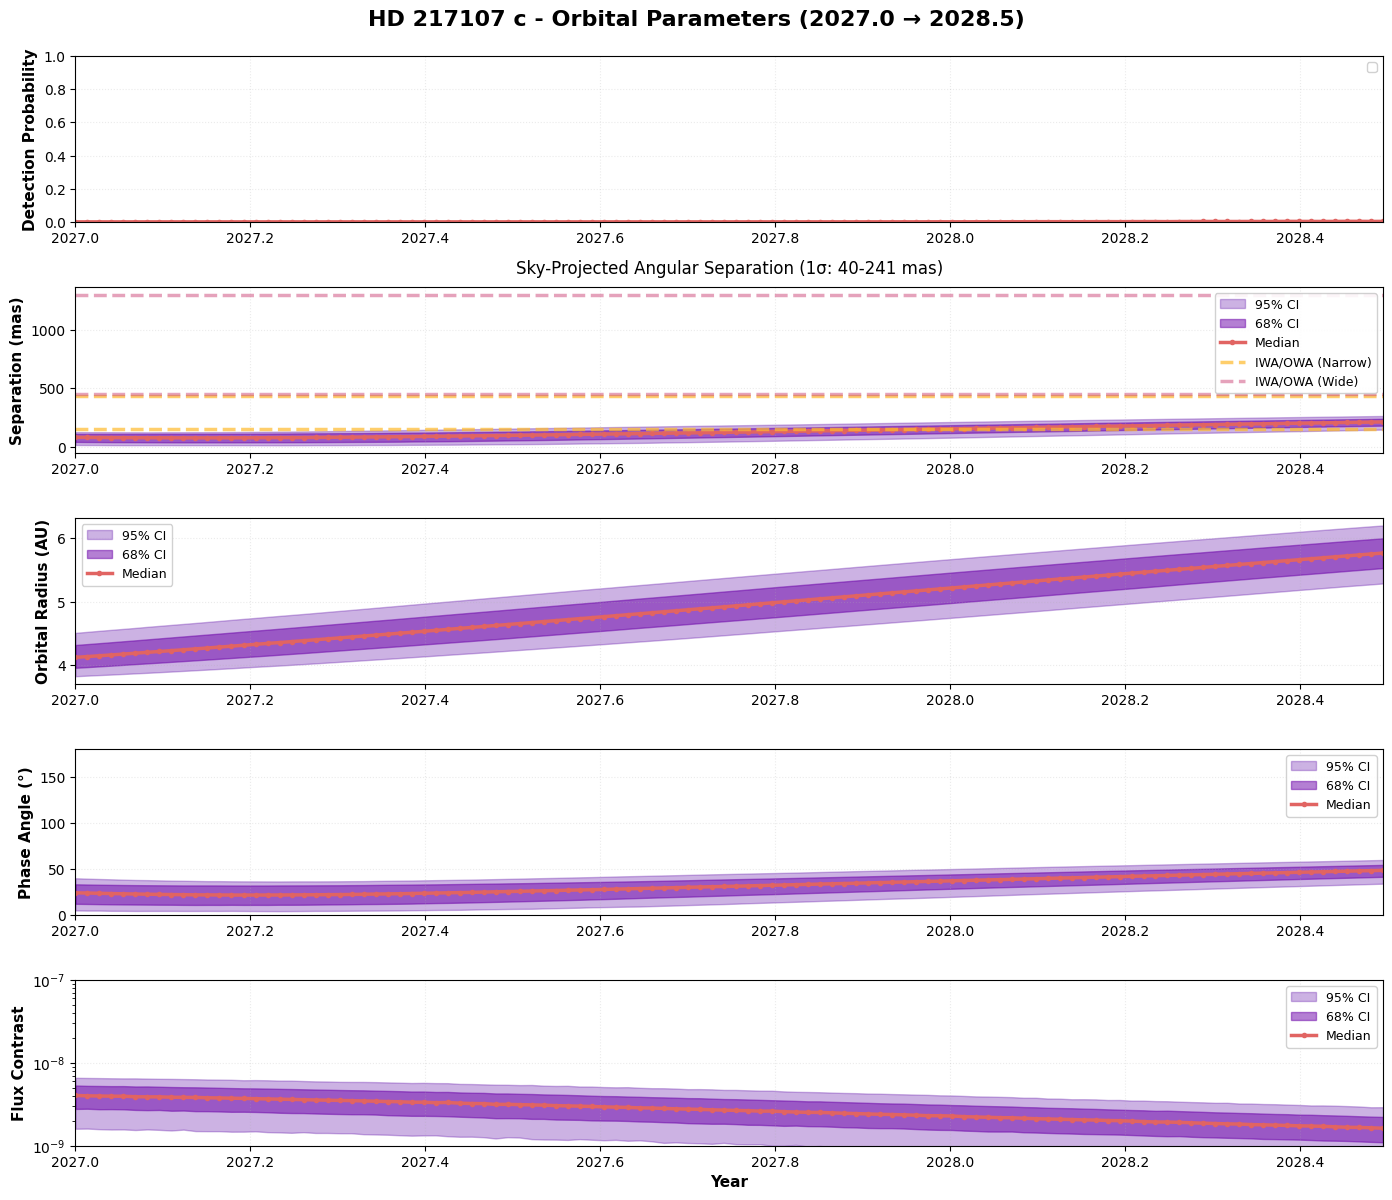

Planet index 12/14: pi_Men_b
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/pi_Men_b_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 12.07 +1.73/-1.03 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 53.65 [45.22, 61.92] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/pi_Men_b_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob -0.00 on 2027-01-06
Peak det prob -0.00 on 2027-07-05
Peak det prob -0.00 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/pi_Men_b_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


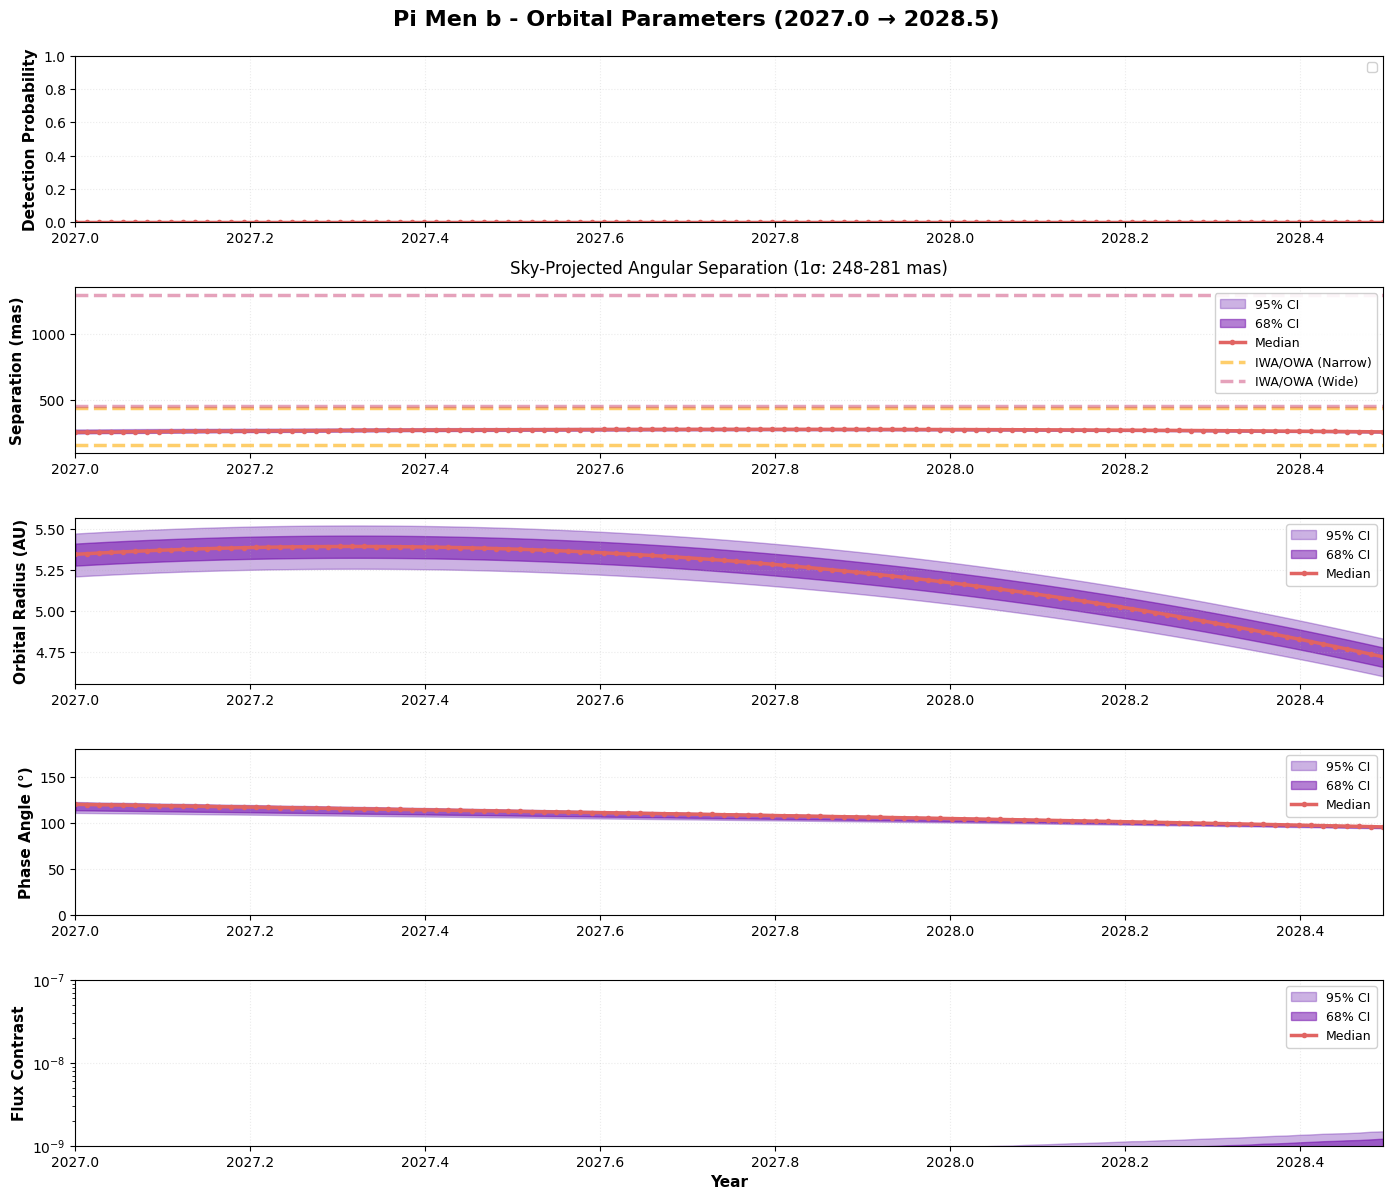

Planet index 13/14: ups_And_d
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/ups_And_d_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 4.25 +0.97/-0.25 M_Jup
Planet radius: 1.00 +0.00/-0.00 R_Jup
Inclination: 88.38 [58.27, 117.69] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/ups_And_d_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob 0.13 on 2027-03-07
Peak det prob 0.30 on 2027-12-27
Peak det prob 0.36 on 2028-03-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/ups_And_d_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


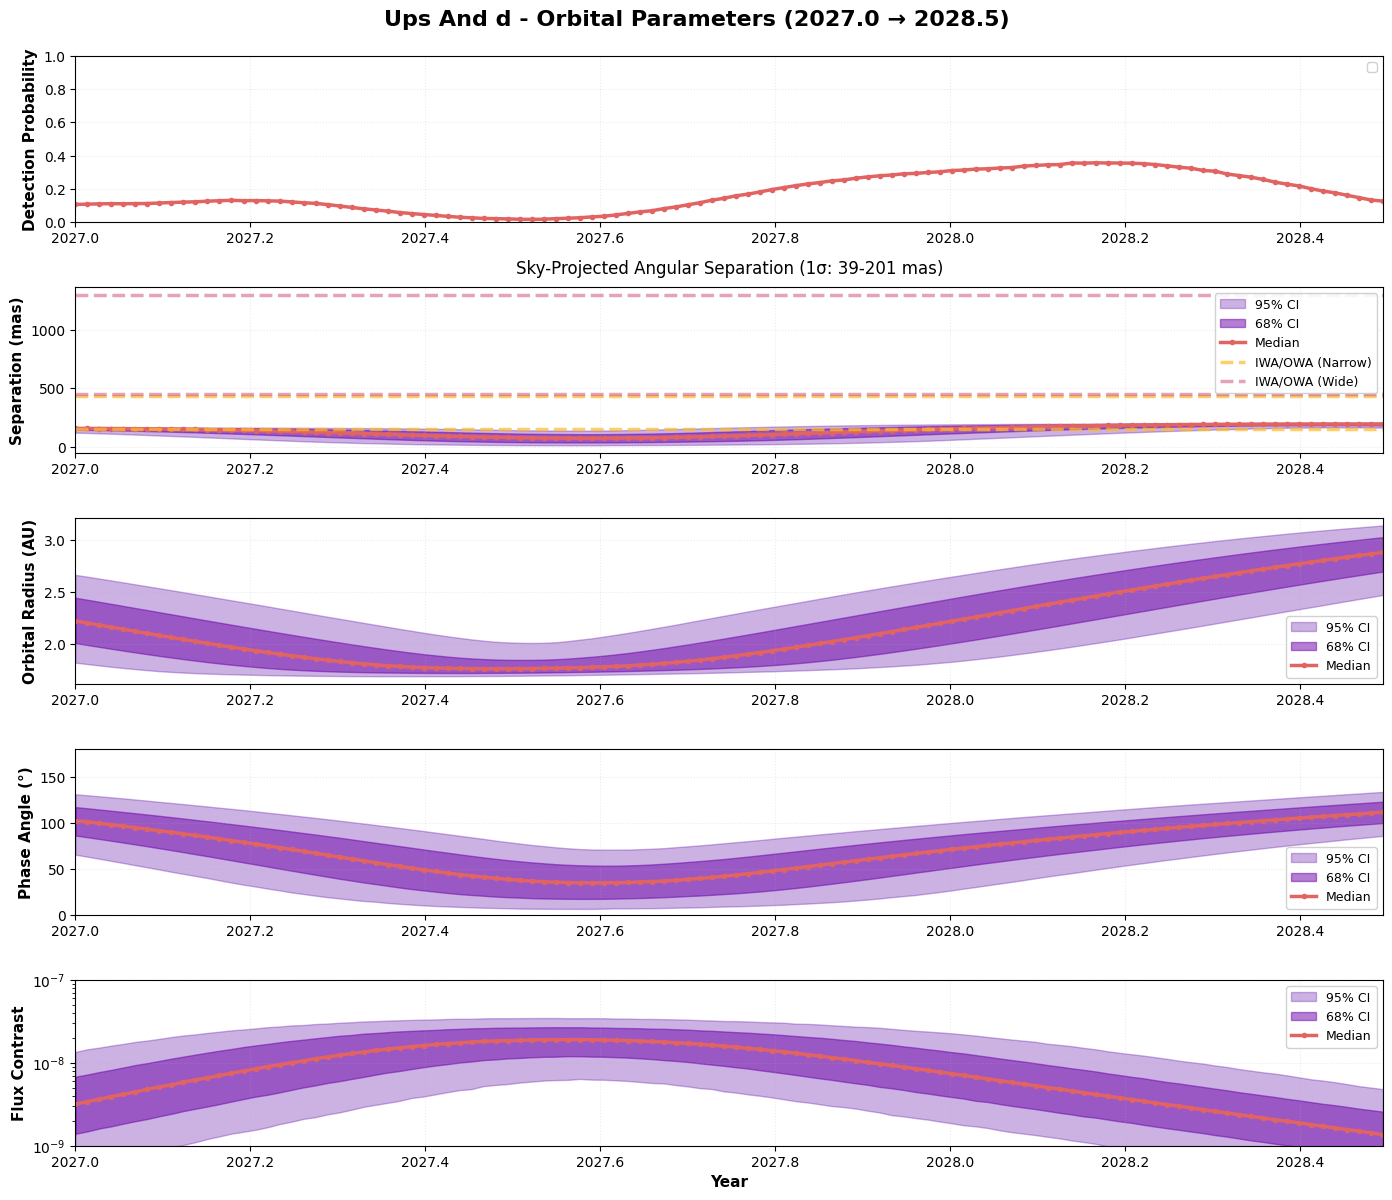

Planet index 14/14: HD_192310_c
Loading point cloud from /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_192310_c_2027-01-01_to_2028-06-30_Orbitize_PointCloud.pkl
Calculating flux contrast & detectability...
Getting target observation windows
Updating summary csv.
Planet mass: 0.08 +0.05/-0.01 M_Jup
Planet radius: 0.38 +0.10/-0.03 R_Jup
Inclination: 89.46 [46.43, 132.41] degrees

Writing output to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_192310_c_2027-01-01_to_2028-06-30_Orbitize_withDetProb.csv...
Peak det prob 0.03 on 2027-06-25
Peak det prob 0.04 on 2027-10-18
Peak det prob 0.03 on 2028-01-01
Plotting...
Plot saved to /Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/HD_192310_c_2027-01-01_to_2028-06-30_Orbitize_orbital_params.png


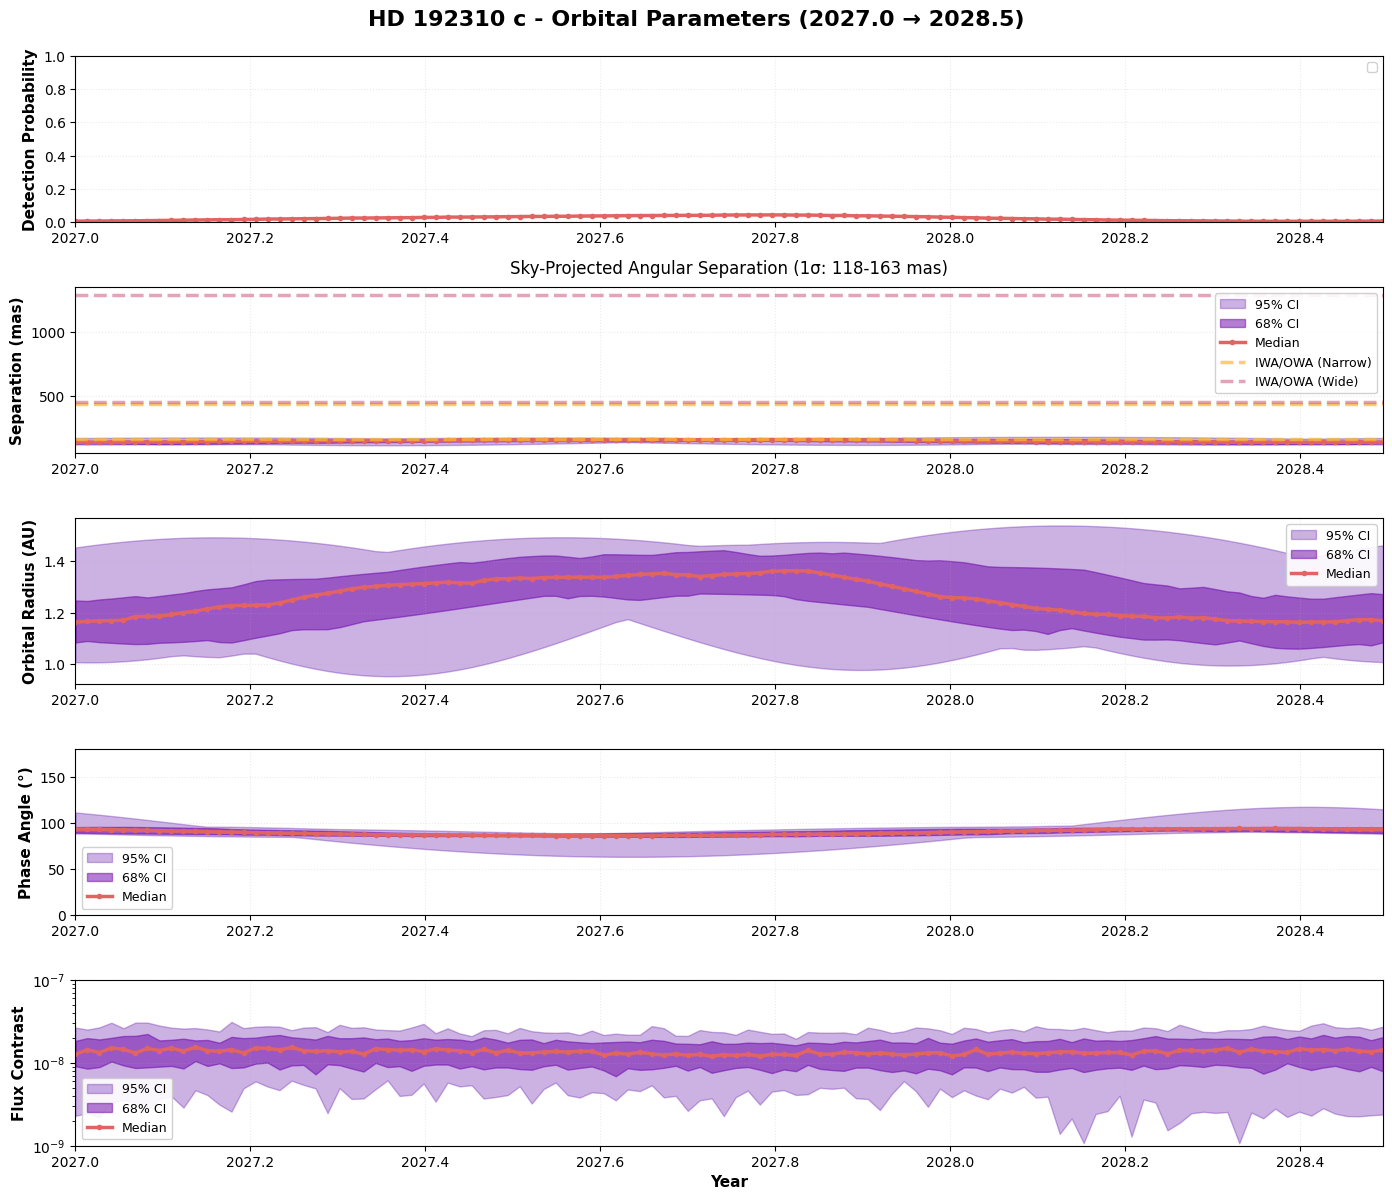

In [8]:
planets = list(orbit_params.keys())
start_date, end_date = "2027-01-01", "2028-06-30"
plot=True
orbit_props_dir = '/Users/clarissardoo/Projects/roman_orbits/roman-table/outputs/outputs_orbitize/'

# Temporary while we wait for albedos from Dmitry
albedo_med = 0.33 # From jupiter albedo, Lacy&Burrows 2019 https://arxiv.org/pdf/1911.10585
albedo_std = 0.1

semesters = [
    ("2027-01-01", "2027-06-30"),
    ("2027-07-01", "2027-12-31"),
    ("2028-01-01", "2028-06-30"),
]

summary_dict = {
    'planet' : [],
    'peak_pdet_sem1' : [],
    'peak_pdet_sem2' : [],
    'peak_pdet_sem3' : [],
    'peak_date_sem1' : [],
    'peak_date_sem2' : [],
    'peak_date_sem3' : [],
    'mean_pdet_sem1' : [],
    'mean_pdet_sem2' : [],
    'mean_pdet_sem3' : [],
    'sep_range_sem1' : [],
    'sep_range_sem2' : [],
    'sep_range_sem3' : [],
    'fc_range_sem1' : [],
    'fc_range_sem2' : [],
    'fc_range_sem3' : [],
    'mag_range_sem1' : [],
    'mag_range_sem2' : [],
    'mag_range_sem3' : [],
}

for p,planet in enumerate(planets):

    fname_base = f"{planet}_{start_date}_to_{end_date}_Orbitize"
    # Load saved point cloud
    print(f'Planet index {p}/{len(planets)-1}: {planet}')
    point_cloud_fname = f"{fname_base}_PointCloud.pkl"
    point_cloud = load_point_cloud(planet,
                     i_dir=orbit_props_dir,
                     fname=point_cloud_fname
                     )

    # Calculate flux contrast (TODO: Update to use albedos/phasecurve from dmitry)
    print('Calculating flux contrast & detectability...')
    albedos = np.random.normal(albedo_med,albedo_std,size=point_cloud['sep_mas'].shape)
    phase_angle_rad = point_cloud['phase_angle_deg'] * np.pi / 180.
    point_cloud['lambert_phase'] = (np.sin(phase_angle_rad)+(np.pi-phase_angle_rad)*np.cos(phase_angle_rad))/np.pi
    point_cloud['phi_x_a'] = point_cloud['lambert_phase'] * albedos

    point_cloud['flux_contrast'] = point_cloud['phi_x_a'] * (point_cloud['r_pl_rjup']*u.R_jup.to(u.AU) / point_cloud['orbital_radius_au'])**2

    point_cloud['is_detectable'] = is_detectable(point_cloud['sep_mas'],
                                                 point_cloud['flux_contrast'],
                                                 concurve)

    point_cloud['detection_probability'] = weighted_mean(point_cloud['is_detectable'],
                                                      weights=point_cloud['ln_likelihood'])

    # Calculate Observation windows
    print('Getting target observation windows')
    times = Time(point_cloud['epoch_mjd'][:,0],format='mjd')
    sun_ang_ref = get_GB_sunang(times)
    point_cloud['GB_not_observable'] = ~((sun_ang_ref.to_value(u.deg) > 54) & (sun_ang_ref.to_value(u.deg) < 126))
    star = orbit_params[planet]['star']
    sun_ang_targ = get_targ_sunang(star,times)
    point_cloud['targ_observable'] = (sun_ang_targ.to_value(u.deg) > 54) & (sun_ang_targ.to_value(u.deg) < 126)

    # Update summary csv
    print('Updating summary csv.')
    csv_data = gen_summary_csv(
        planet,
        point_cloud,
        orbit_props_dir,
        fname_base+'_withDetProb')

    # Calculate stats for each semester
    summary_dict['planet'].append(planet)
    for s,semester in enumerate(semesters):

        # Get the sections of the table in just the semester of interest
        snum=s+1
        s_start, s_end = Time(list(semester))
        dates_iso = Time(list(csv_data.date_iso.values))
        sem_df = csv_data.loc[(dates_iso>s_start) & (dates_iso<s_end)]

        peak_pdet = f"{np.max(sem_df.det_probability):.2f}"
        peak_date = sem_df.date_iso.iloc[np.argmax(sem_df.det_probability)][:10]
        mean_pdet = f"{np.mean(sem_df.det_probability):.2f}"
        sep_range = f'{np.round(np.min(sem_df.separation_mas_16th),0)} - {np.round(np.max(sem_df.separation_mas_84th),0)}'
        fc_range = '%.2E'%Decimal(np.min(sem_df.flux_contrast_16th)) + ' - ' + '%.2E'%Decimal(np.max(sem_df.flux_contrast_84th))

        print(f'Peak det prob {peak_pdet} on {peak_date}')

        summary_dict[f'peak_pdet_sem{snum}'].append(peak_pdet)
        summary_dict[f'peak_date_sem{snum}'].append(peak_date)
        summary_dict[f'mean_pdet_sem{snum}'].append(mean_pdet)
        summary_dict[f'sep_range_sem{snum}'].append(sep_range)
        summary_dict[f'fc_range_sem{snum}'].append(fc_range)
        summary_dict[f'mag_range_sem{snum}'].append(None)

    print('Plotting...')
    plot_outfpath = os.path.join(orbit_props_dir,fname_base)
    plot_orbital_parameters(planet,csv_data,plot_outfpath,
                                override_lan=0.,
                                start_date=start_date,end_date=end_date,
                                figsize=None,fig_ext='png',
                                show_plots=True,)





In [9]:
# Display detection probabilities in format expected by wiki pages
planet_order = [
    '47 UMa b',
    '47 UMa c',
    '47 UMa d',
    'HD 190360 b',
    '55 Cnc d',
    'HD 160691 c',
    'HD 154345 b',
    '14 Her b',
    '14 Her c',
    'ups And d',
    'HD 217107 c',
    'eps Eri b',
    'pi Men b',
    'HD 192310 c',
    'HD 134987 c',
    'HD 87883 b',
    'HD 114783 c',
]

alltargs_df = pd.DataFrame(summary_dict)

alltargs_table = Table.from_pandas(alltargs_df)
display(alltargs_table['planet','peak_pdet_sem1','peak_pdet_sem2','peak_pdet_sem3'])

def extract_single_targ_pdet_summary(alltargs_df,planet_index):
    columns = ['mean_pdet','peak_pdet_window','separation_range','flux_contrast_range','mag_range']
    singletarg_dict = {}
    for s in range(len(semesters)):
        s += 1
        mean_pdet = alltargs_df.loc[planet_index,f'mean_pdet_sem{s}'].lstrip('-')
        peak_pdetanddate = f"{alltargs_df.loc[planet_index,f'peak_pdet_sem{s}']}, {alltargs_df.loc[planet_index,f'peak_date_sem{s}']}".lstrip('-')

        sep_range = alltargs_df.loc[planet_index,f'sep_range_sem{s}']
        fc_range = alltargs_df.loc[planet_index,f'fc_range_sem{s}']
        mag_range = alltargs_df.loc[planet_index,f'mag_range_sem{s}']
        singletarg_dict[s] = [mean_pdet,peak_pdetanddate,sep_range,fc_range,mag_range]
    singletarg_df = pd.DataFrame.from_dict(singletarg_dict,orient='index',columns=columns)

    return singletarg_df

temp = alltargs_df.set_index('planet')
temp.sort_values('peak_pdet_sem1',ascending=False,inplace=True)

for p in temp.index:
    print(p)
    p = '_'.join(p.split(' '))
    if p in temp.index:
        singletarg_df = extract_single_targ_pdet_summary(temp,p)
        singletargs_table = Table.from_pandas(singletarg_df)
        display(singletargs_table)


<Table length=15>
   planet   peak_pdet_sem1 peak_pdet_sem2 peak_pdet_sem3
   str11         str5           str5           str5     
----------- -------------- -------------- --------------
   47_UMa_c           0.19           0.26           0.26
   47_UMa_b          -0.00           0.00          -0.00
   47_UMa_d          -0.00          -0.00          -0.00
   55_Cnc_d          -0.00          -0.00          -0.00
  eps_Eri_b           0.17           0.04           0.00
 HD_87883_b          -0.00          -0.00          -0.00
HD_114783_c           0.01           0.01           0.00
HD_134987_c          -0.00          -0.00          -0.00
HD_154345_b           0.22           0.08           0.00
HD_160691_c          -0.00          -0.00          -0.00
HD_190360_b           0.17           0.09           0.30
HD_217107_c           0.00           0.00           0.00
   pi_Men_b          -0.00          -0.00          -0.00
  ups_And_d           0.13           0.30           0.36
HD_192310_c           0.03           0.04           0.03

HD_154345_b


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.18 0.22, 2027-02-10    166.0 - 219.0 1.35E-09 - 4.05E-09        --
     0.02 0.08, 2027-07-05    199.0 - 223.0 7.35E-10 - 2.73E-09        --
     0.00 0.00, 2028-01-01    175.0 - 222.0 3.20E-10 - 1.62E-09        --

47_UMa_c


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.16 0.19, 2027-06-25     74.0 - 251.0 1.89E-09 - 3.91E-09        --
     0.23 0.26, 2027-12-22    118.0 - 254.0 1.77E-09 - 3.81E-09        --
     0.24 0.26, 2028-02-20    177.0 - 255.0 1.42E-09 - 3.61E-09        --

eps_Eri_b


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str14              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.13 0.17, 2027-01-06    209.0 - 952.0 2.48E-09 - 5.29E-09        --
     0.01 0.04, 2027-07-05   496.0 - 1054.0 2.10E-09 - 4.85E-09        --
     0.00 0.00, 2028-01-01   811.0 - 1150.0 1.60E-09 - 4.09E-09        --

HD_190360_b


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str12              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.13 0.17, 2027-01-11     52.0 - 207.0 2.12E-09 - 5.56E-09        --
     0.08 0.09, 2027-07-05     24.0 - 166.0 2.86E-09 - 7.35E-09        --
     0.14 0.30, 2028-06-24     61.0 - 159.0 3.73E-09 - 7.98E-09        --

ups_And_d


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.09 0.13, 2027-03-07     43.0 - 163.0 1.49E-09 - 2.64E-08        --
     0.15 0.30, 2027-12-27     39.0 - 179.0 4.04E-09 - 2.69E-08        --
     0.29 0.36, 2028-03-01    116.0 - 201.0 7.16E-10 - 1.34E-08        --

HD_192310_c


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.02 0.03, 2027-06-25    118.0 - 159.0 7.26E-09 - 2.23E-08        --
     0.04 0.04, 2027-10-18    133.0 - 163.0 6.88E-09 - 2.00E-08        --
     0.01 0.03, 2028-01-01    119.0 - 157.0 7.25E-09 - 2.17E-08        --

HD_114783_c


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.01 0.01, 2027-01-21     60.0 - 199.0 1.39E-09 - 2.99E-09        --
     0.00 0.01, 2027-07-25     87.0 - 216.0 1.23E-09 - 2.77E-09        --
     0.00 0.00, 2028-01-01    128.0 - 233.0 1.04E-09 - 2.45E-09        --

HD_217107_c


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-01-11     40.0 - 130.0 2.15E-09 - 5.27E-09        --
     0.00 0.00, 2027-12-27     57.0 - 184.0 1.55E-09 - 4.23E-09        --
     0.00 0.00, 2028-06-14    119.0 - 239.0 1.11E-09 - 3.09E-09        --

47_UMa_b


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-01-06     23.0 - 135.0 7.49E-09 - 2.11E-08        --
     0.00 0.00, 2027-09-28    124.0 - 147.0 1.53E-09 - 1.39E-08        --
     0.00 0.00, 2028-01-01     24.0 - 138.0 6.90E-12 - 3.29E-09        --

47_UMa_d


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str14              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-01-06   472.0 - 1500.0 5.85E-11 - 2.08E-10        --
     0.00 0.00, 2027-07-05   462.0 - 1506.0 5.79E-11 - 2.08E-10        --
     0.00 0.00, 2028-01-01   457.0 - 1511.0 5.70E-11 - 2.12E-10        --

55_Cnc_d


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-01-06     78.0 - 217.0 6.97E-13 - 2.03E-11        --
     0.00 0.00, 2027-07-05    149.0 - 289.0 4.87E-12 - 5.58E-11        --
     0.00 0.00, 2028-01-01    225.0 - 353.0 1.77E-11 - 1.24E-10        --

HD_87883_b


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-01-06    312.0 - 353.0 1.67E-10 - 3.57E-10        --
     0.00 0.00, 2027-07-05    325.0 - 362.0 1.65E-10 - 3.37E-10        --
     0.00 0.00, 2028-01-01    332.0 - 364.0 1.63E-10 - 3.37E-10        --

HD_134987_c


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-01-06     62.0 - 224.0 1.27E-12 - 9.01E-11        --
     0.00 0.00, 2027-07-05     88.0 - 232.0 3.70E-12 - 1.05E-10        --
     0.00 0.00, 2028-01-01    120.0 - 242.0 9.56E-12 - 1.32E-10        --

HD_160691_c


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-01-06     58.0 - 236.0 1.72E-12 - 1.58E-10        --
     0.00 0.00, 2027-07-05    129.0 - 268.0 1.88E-11 - 2.65E-10        --
     0.00 0.00, 2028-01-01    203.0 - 300.0 7.79E-11 - 4.64E-10        --

pi_Men_b


<Table length=3>
mean_pdet peak_pdet_window separation_range flux_contrast_range mag_range
   str4        str16            str13              str19          object 
--------- ---------------- ---------------- ------------------- ---------
     0.00 0.00, 2027-01-06    249.0 - 280.0 2.11E-10 - 5.41E-10        --
     0.00 0.00, 2027-07-05    268.0 - 281.0 2.87E-10 - 7.64E-10        --
     0.00 0.00, 2028-01-01    254.0 - 279.0 4.07E-10 - 1.19E-09        --